# Mayo dataset Analysis and Machine learnig work

### Import all needed libraries in here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline
import statsmodels.api as sm
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import tree
import itertools
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor

### Import 2019 Mayo Clinic Primary Biliary Cirrhosis Data by csv format here

In [2]:
drawData = pd.read_csv('2019 Mayo Clinic Primary Biliary Cirrhosis Data.csv')
drawData.head()

id  time  status  trt        age sex  ascites  hepato  spiders  edema  \
0   1   400       2  1.0  58.765229   f      1.0     1.0      1.0    1.0   
1   2  4500       0  1.0  56.446270   f      0.0     1.0      1.0    0.0   
2   3  1012       2  1.0  70.072553   m      0.0     0.0      0.0    0.5   
3   4  1925       2  1.0  54.740589   f      0.0     1.0      1.0    0.5   
4   5  1504       1  2.0  38.105407   f      0.0     1.0      1.0    0.0   

   bili   chol  albumin  copper  alk.phos     ast   trig  platelet  protime  \
0  14.5  261.0     2.60   156.0    1718.0  137.95  172.0     190.0     12.2   
1   1.1  302.0     4.14    54.0    7394.8  113.52   88.0     221.0     10.6   
2   1.4  176.0     3.48   210.0     516.0   96.10   55.0     151.0     12.0   
3   1.8  244.0     2.54    64.0    6121.8   60.63   92.0     183.0     10.3   
4   3.4  279.0     3.53   143.0     671.0  113.15   72.0     136.0     10.9   

   stage  
0    4.0  
1    3.0  
2    4.0  
3    4.0  
4    3.0

In [3]:
# row and column count
rowCount = drawData.shape[0]
colCount = drawData.shape[1]
print(Back.GREEN+f'dataset have '+Back.RED+(str(rowCount))+Back.GREEN+' instances(rows)')
print(Back.GREEN+f'dataset have '+Back.RED+(str(colCount))+'  '+
      Back.GREEN+' features(columns)')

dataset have 418 instances(rows)
dataset have 20   features(columns)


## Dataset desciribe here

In [4]:
drawData.describe().T

count         mean          std         min          25%  \
id        418.0   209.500000   120.810458    1.000000   105.250000   
time      418.0  1917.782297  1104.672992   41.000000  1092.750000   
status    418.0     0.830144     0.955785    0.000000     0.000000   
trt       312.0     1.493590     0.500762    1.000000     1.000000   
age       418.0    50.741551    10.447214   26.277892    42.832307   
ascites   312.0     0.076923     0.266897    0.000000     0.000000   
hepato    312.0     0.512821     0.500639    0.000000     0.000000   
spiders   312.0     0.288462     0.453775    0.000000     0.000000   
edema     418.0     0.100478     0.253417    0.000000     0.000000   
bili      418.0     3.220813     4.407506    0.300000     0.800000   
chol      284.0   369.510563   231.944545  120.000000   249.500000   
albumin   418.0     3.497440     0.424972    1.960000     3.242500   
copper    310.0    97.648387    85.613920    4.000000    41.250000   
alk.phos  312.0  1982.655769  2140.388824  289.000000   871.500000   
ast       312.0   122.556346    56.699525   26.350000    80.600000   
trig      282.0   124.702128    65.148639   33.000000    84.250000   
platelet  407.0   257.024570    98.325585   62.000000   188.500000   
protime   416.0    10.731731     1.022000    9.000000    10.000000   
stage     412.0     3.024272     0.882042    1.000000     2.000000   

                  50%          75%           max  
id         209.500000   313.750000    418.000000  
time      1730.000000  2613.500000   4795.000000  
status       0.000000     2.000000      2.000000  
trt          1.000000     2.000000      2.000000  
age         51.000684    58.240931     78.439425  
ascites      0.000000     0.000000      1.000000  
hepato       1.000000     1.000000      1.000000  
spiders      0.000000     1.000000      1.000000  
edema        0.000000     0.000000      1.000000  
bili         1.400000     3.400000     28.000000  
chol       309.500000   400.000000   1775.000000  
albumin      3.530000     3.770000      4.640000  
copper      73.000000   123.000000    588.000000  
alk.phos  1259.000000  1980.000000  13862.400000  
ast        114.700000   151.900000    457.250000  
trig       108.000000   151.000000    598.000000  
platelet   251.000000   318.000000    721.000000  
protime     10.600000    11.100000     18.000000  
stage        3.000000     4.000000      4.000000

## null data count show here

Text(0.5, 1.0, 'NULL data count')

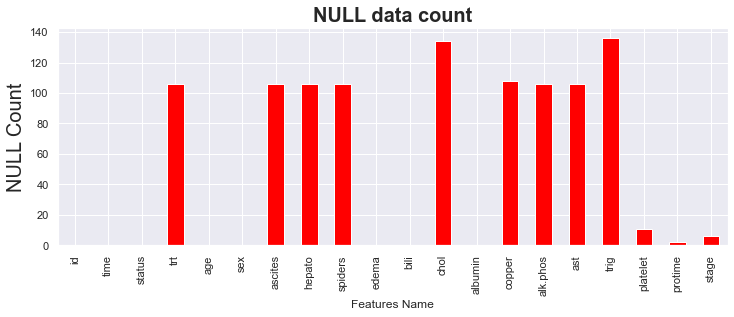

In [5]:
x = plt.figure(figsize = (12, 4))
x.set_facecolor('w')
drawData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')

In [6]:
drawData.dtypes

id            int64
time          int64
status        int64
trt         float64
age         float64
sex          object
ascites     float64
hepato      float64
spiders     float64
edema       float64
bili        float64
chol        float64
albumin     float64
copper      float64
alk.phos    float64
ast         float64
trig        float64
platelet    float64
protime     float64
stage       float64
dtype: object

#### Change data types into numerical

In [7]:
# sex unique categorical data value for change into num
print(Back.GREEN+'Sex unique values :\n')
print(drawData.sex.value_counts(),'\n')

Sex unique values :

f    374
m     44
Name: sex, dtype: int64 



In [8]:
# use pandas map for change categ into num
drawData['sex'] = drawData['sex'].map({'m':1, 'f':0})

In [9]:
drawData.dtypes

id            int64
time          int64
status        int64
trt         float64
age         float64
sex           int64
ascites     float64
hepato      float64
spiders     float64
edema       float64
bili        float64
chol        float64
albumin     float64
copper      float64
alk.phos    float64
ast         float64
trig        float64
platelet    float64
protime     float64
stage       float64
dtype: object

In [10]:
# all data in numerical now

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

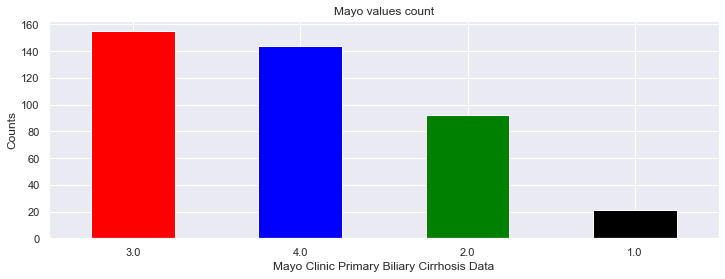

In [11]:
x = plt.figure(figsize = (12, 4))
x.set_facecolor('w')
drawData.stage.value_counts().plot.bar(color = ['red', 'blue', 'green' , 'black'], )
plt.xlabel('Mayo Clinic Primary Biliary Cirrhosis Data')
plt.ylabel('Counts')
plt.title('Mayo values count')
plt.xticks(rotation=0, horizontalalignment="center")

In [12]:
# Mayo Clinic Primary Biliary Cirrhosis Data target is no balance

## features distributions

In [13]:
drawData.columns

Index(['id', 'time', 'status', 'trt', 'age', 'sex', 'ascites', 'hepato',
       'spiders', 'edema', 'bili', 'chol', 'albumin', 'copper', 'alk.phos',
       'ast', 'trig', 'platelet', 'protime', 'stage'],
      dtype='object')

C:\Users\Top\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Top\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Top\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Top\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Top\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Top\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have v

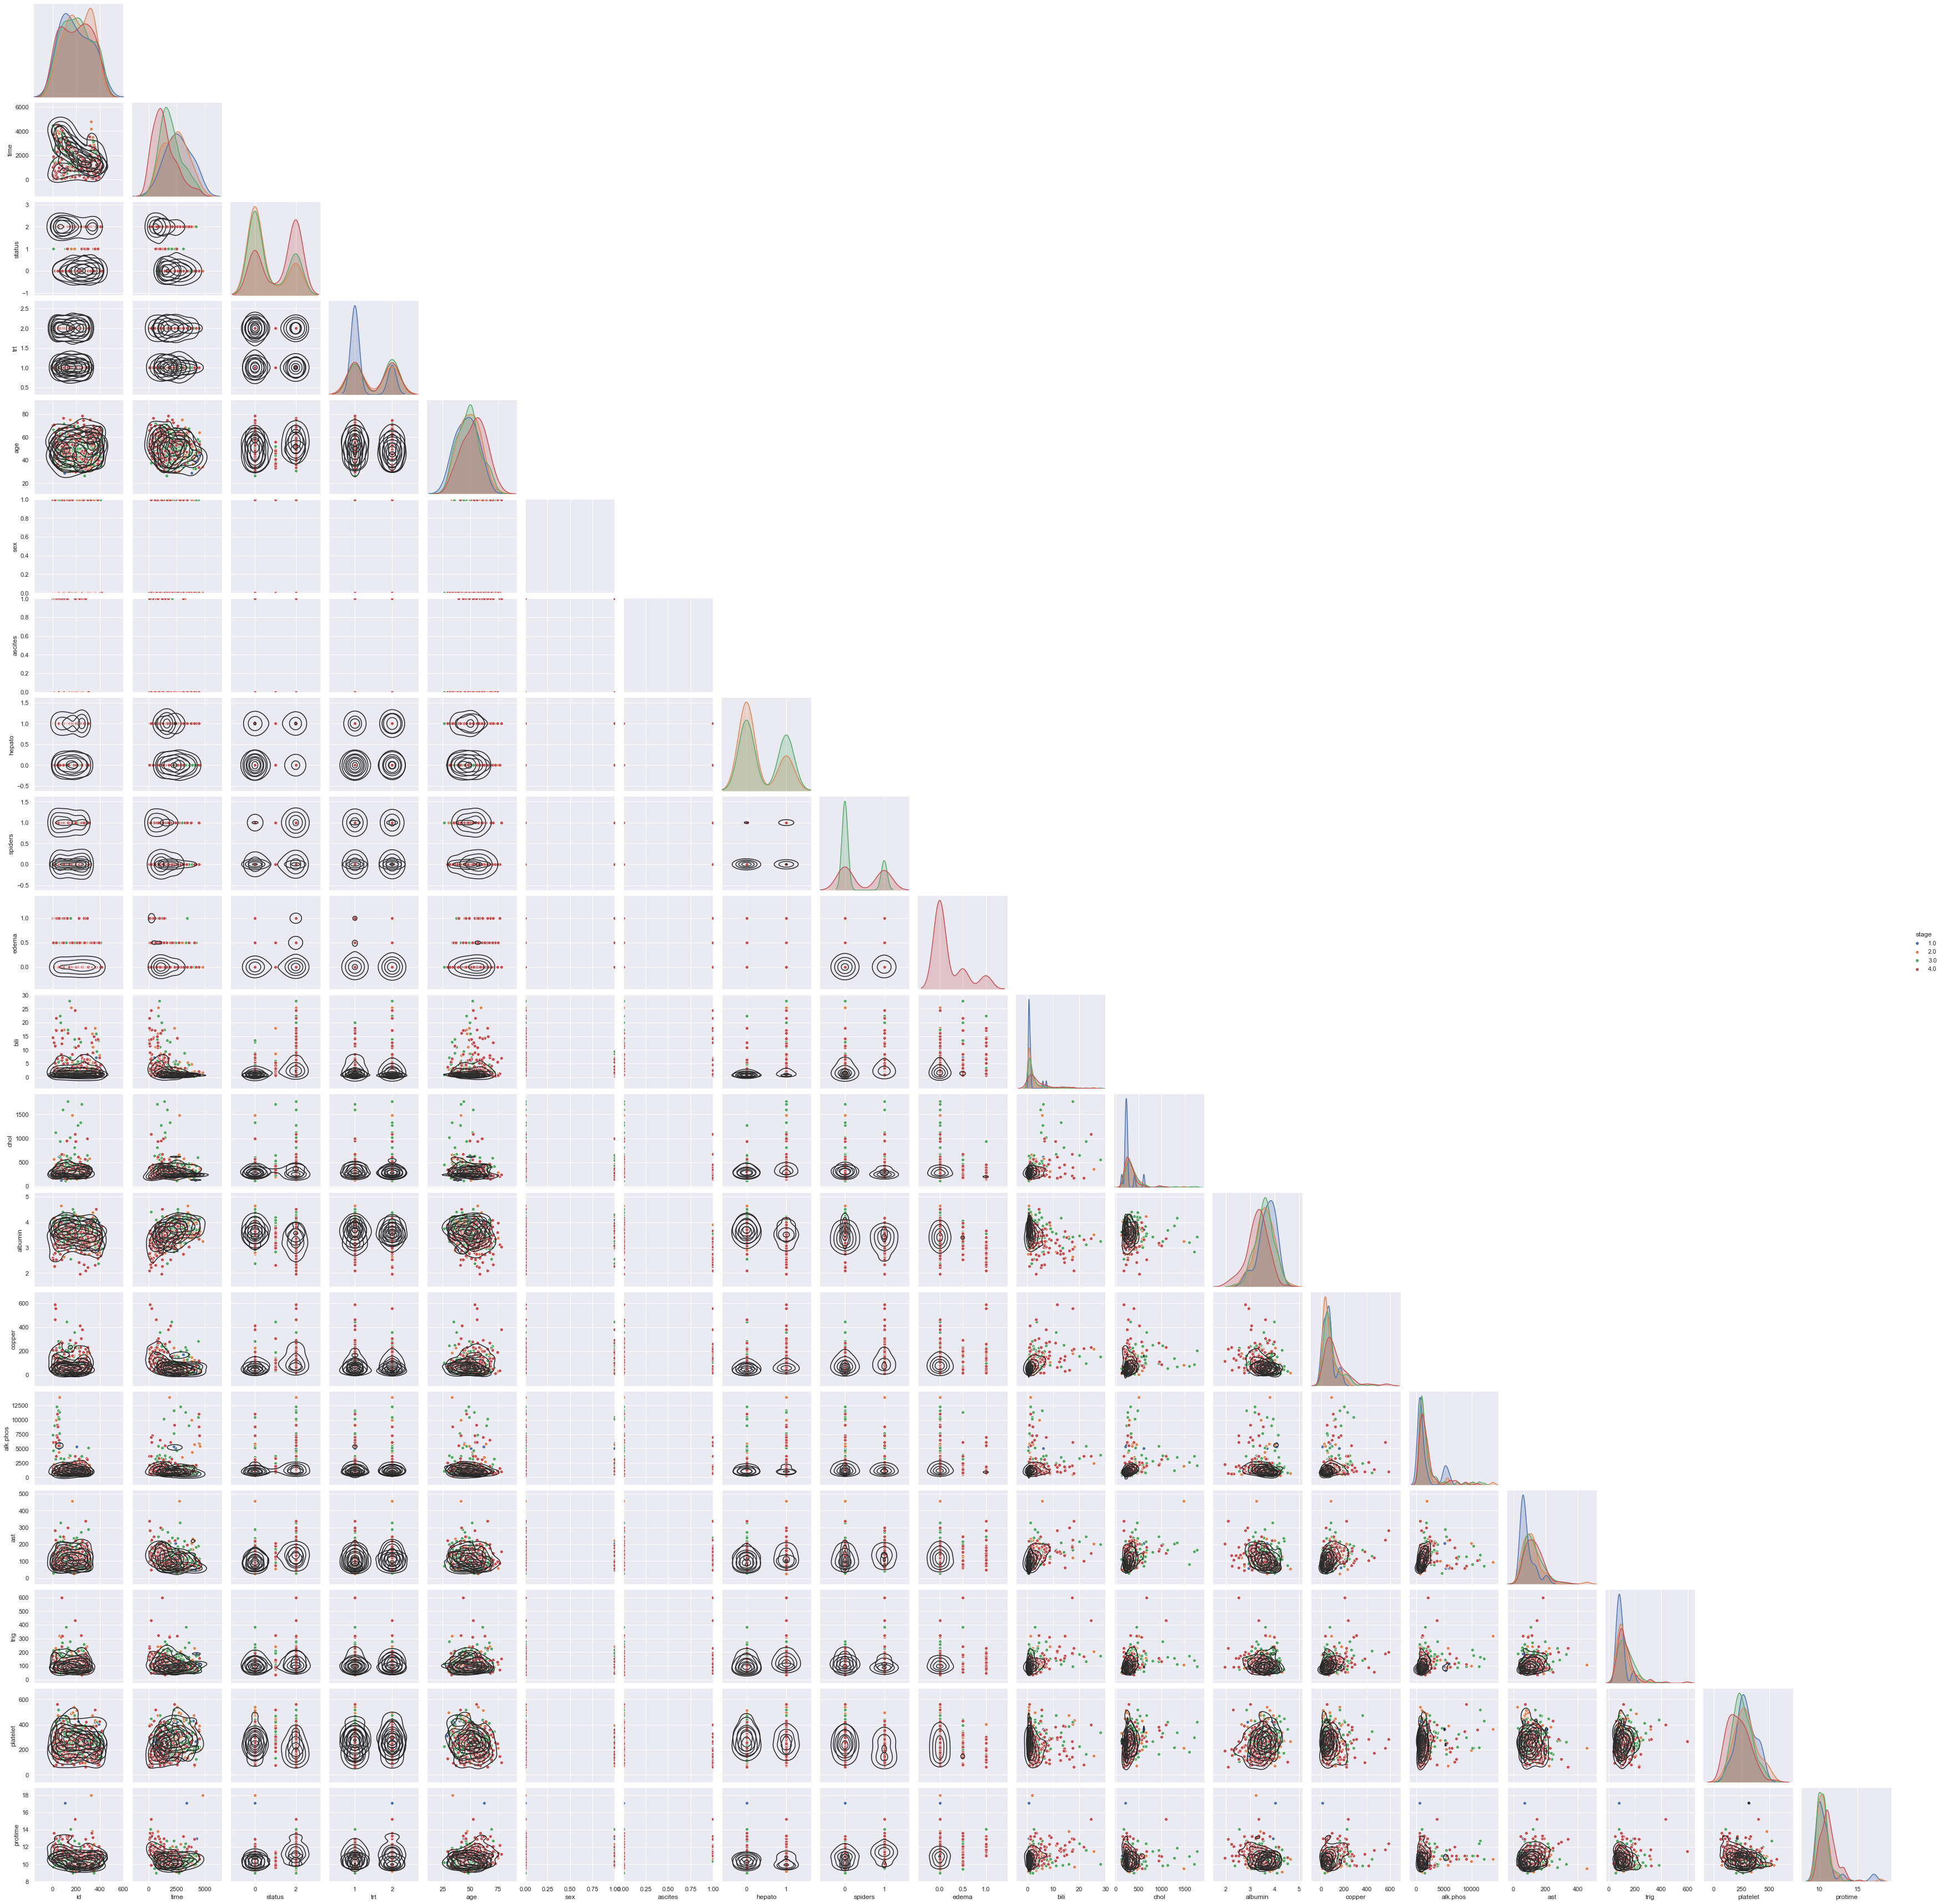

In [14]:
g = sns.pairplot(drawData , hue="stage" , palette="deep" , corner = True)
g.map_lower(sns.kdeplot, levels=4, color=".2") 

In [15]:
# round 10 for Age data for box plot
# define new feature(columns) by roundAge name
drawData['RoundAge'] = round(drawData['age'],-1)
drawData['age'] = drawData['age'].astype(int)
drawData.head()

id  time  status  trt  age  sex  ascites  hepato  spiders  edema  ...  \
0   1   400       2  1.0   58    0      1.0     1.0      1.0    1.0  ...   
1   2  4500       0  1.0   56    0      0.0     1.0      1.0    0.0  ...   
2   3  1012       2  1.0   70    1      0.0     0.0      0.0    0.5  ...   
3   4  1925       2  1.0   54    0      0.0     1.0      1.0    0.5  ...   
4   5  1504       1  2.0   38    0      0.0     1.0      1.0    0.0  ...   

    chol  albumin  copper  alk.phos     ast   trig  platelet  protime  stage  \
0  261.0     2.60   156.0    1718.0  137.95  172.0     190.0     12.2    4.0   
1  302.0     4.14    54.0    7394.8  113.52   88.0     221.0     10.6    3.0   
2  176.0     3.48   210.0     516.0   96.10   55.0     151.0     12.0    4.0   
3  244.0     2.54    64.0    6121.8   60.63   92.0     183.0     10.3    4.0   
4  279.0     3.53   143.0     671.0  113.15   72.0     136.0     10.9    3.0   

   RoundAge  
0      60.0  
1      60.0  
2      70.0  
3      50.0  
4      40.0  

[5 rows x 21 columns]

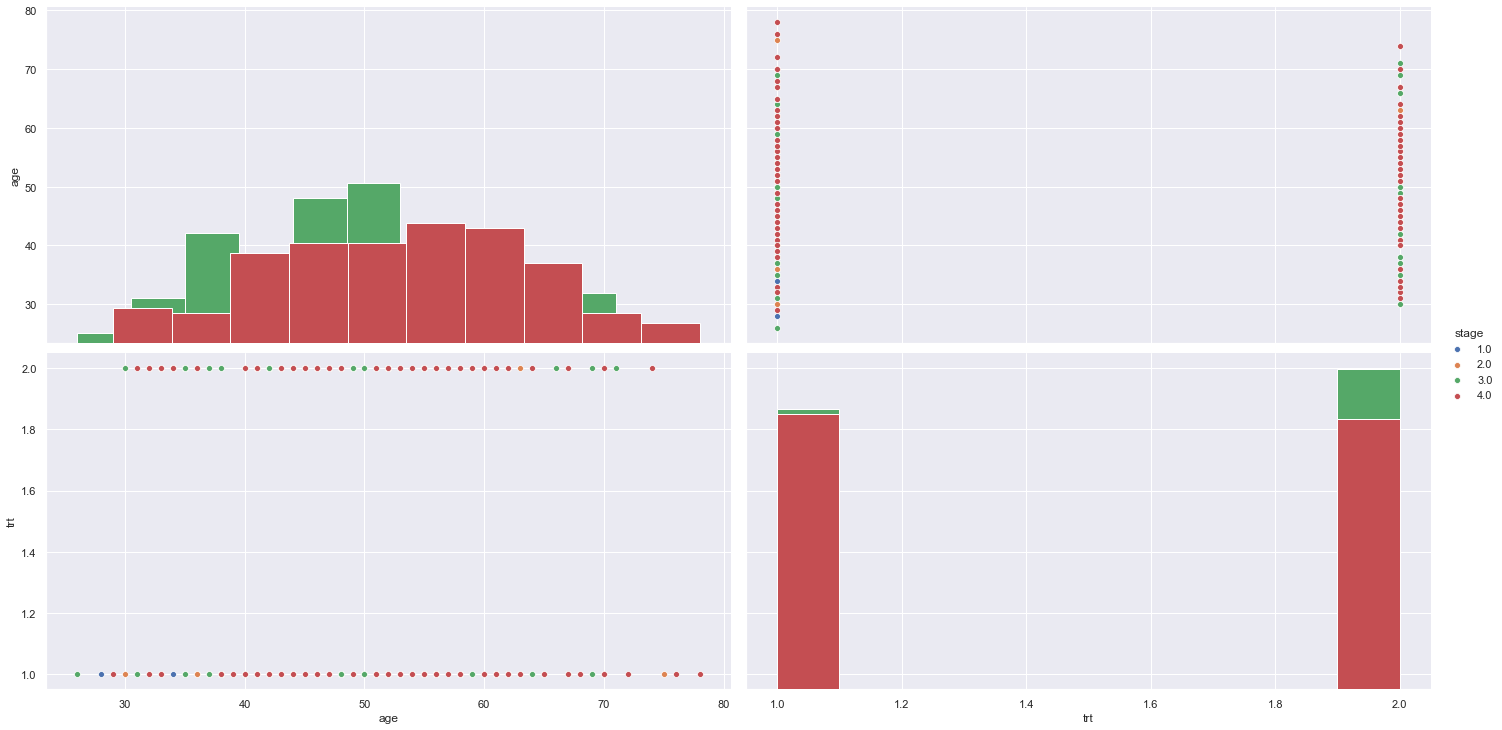

In [16]:
sns.pairplot(drawData[['age', 'trt', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

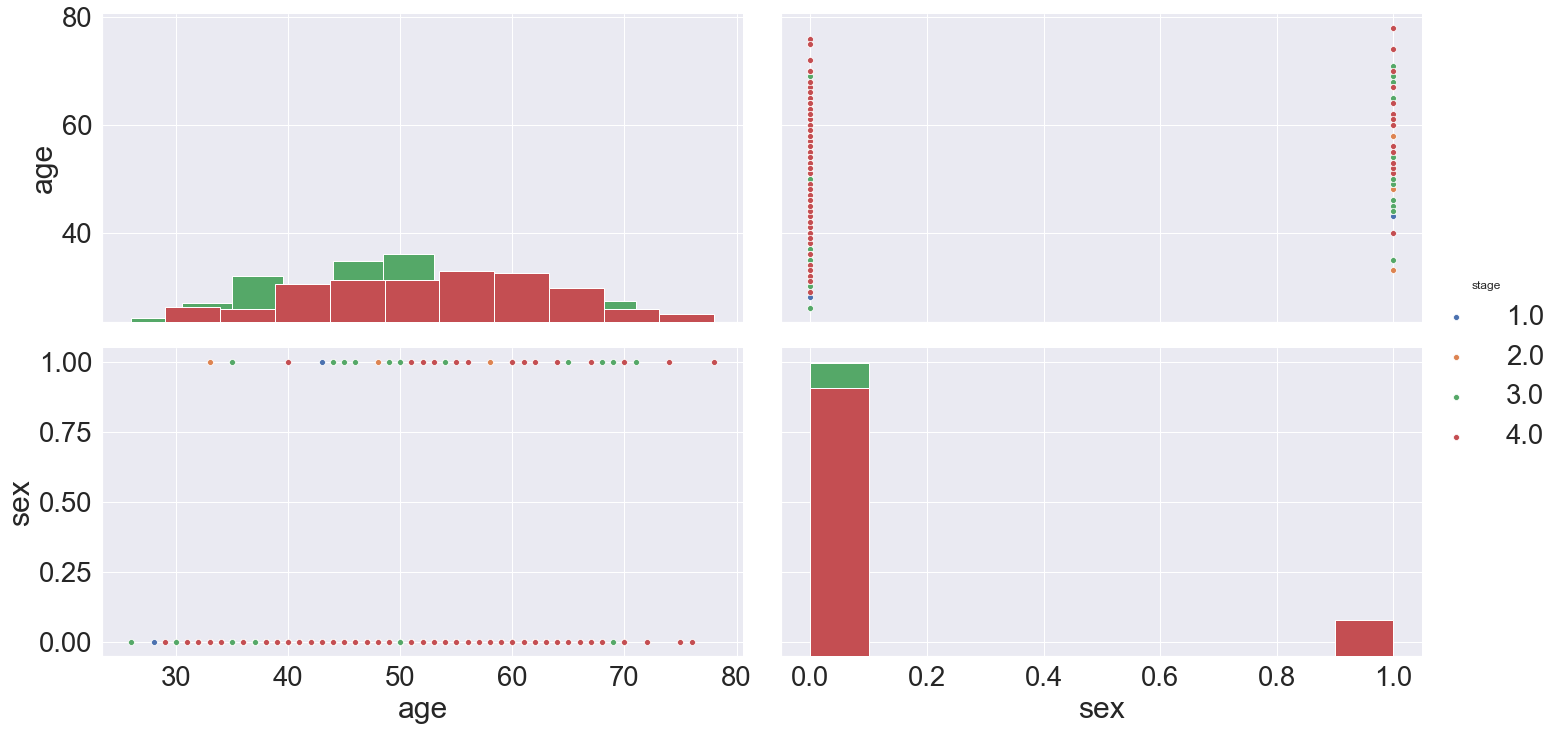

In [17]:
sns.pairplot(drawData[['age', 'sex', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

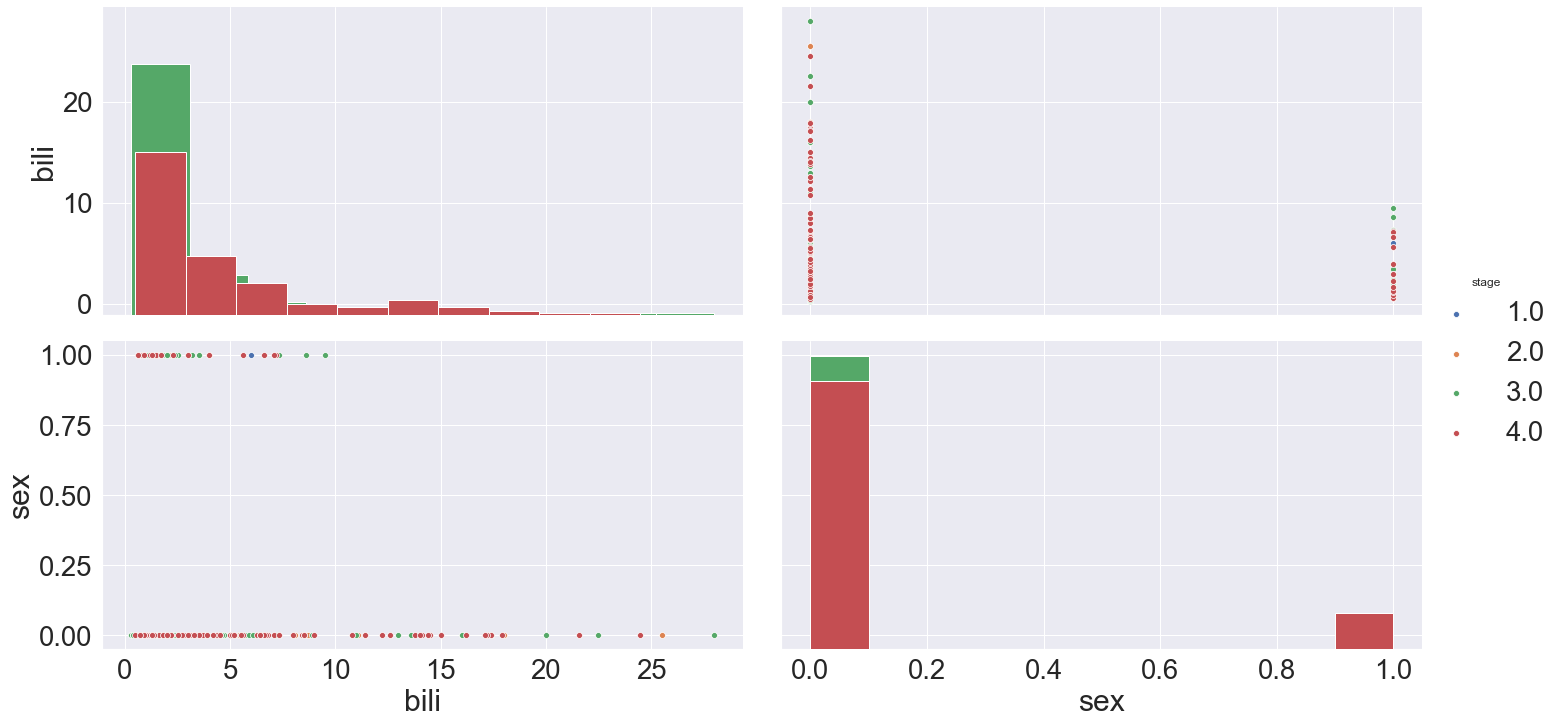

In [18]:
sns.pairplot(drawData[['bili', 'sex', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

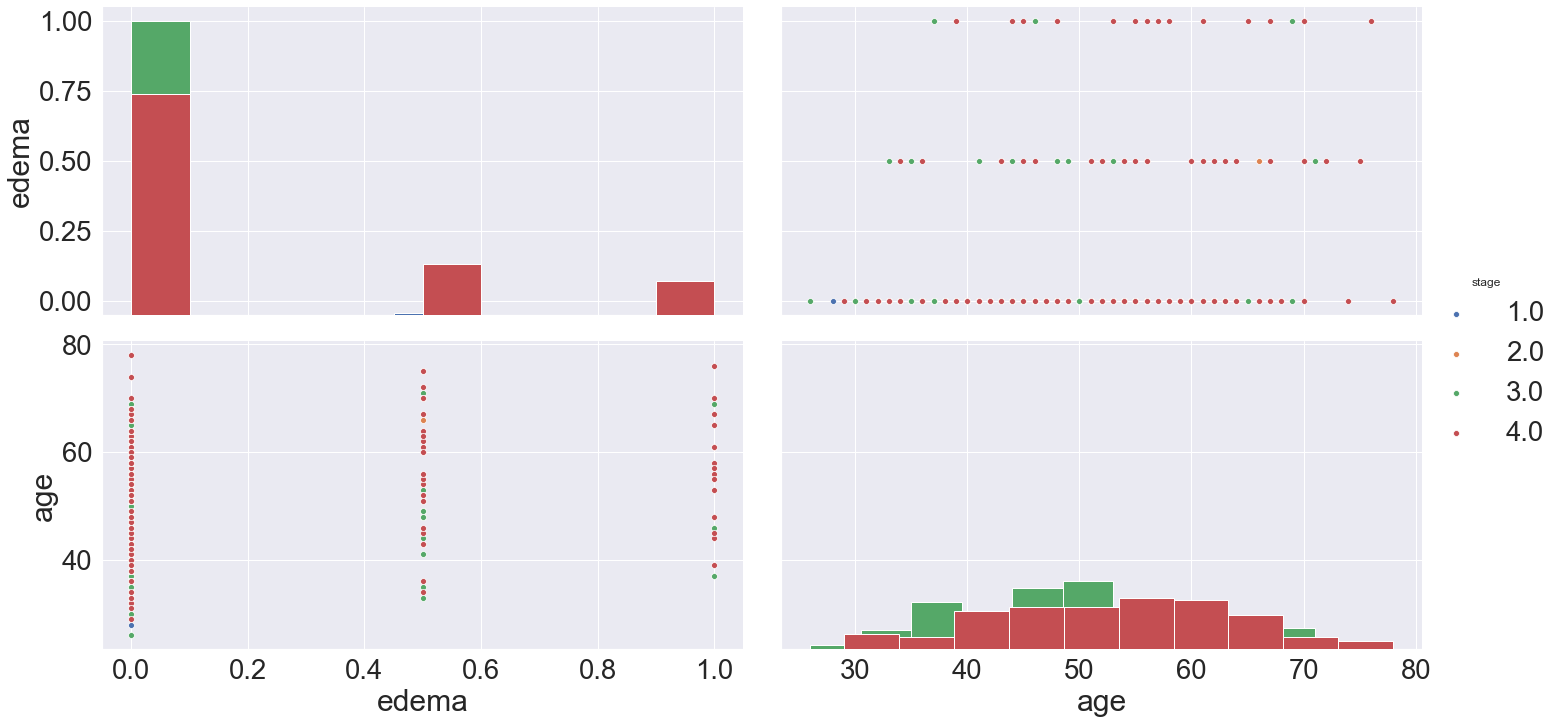

In [19]:
sns.pairplot(drawData[['edema', 'age', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

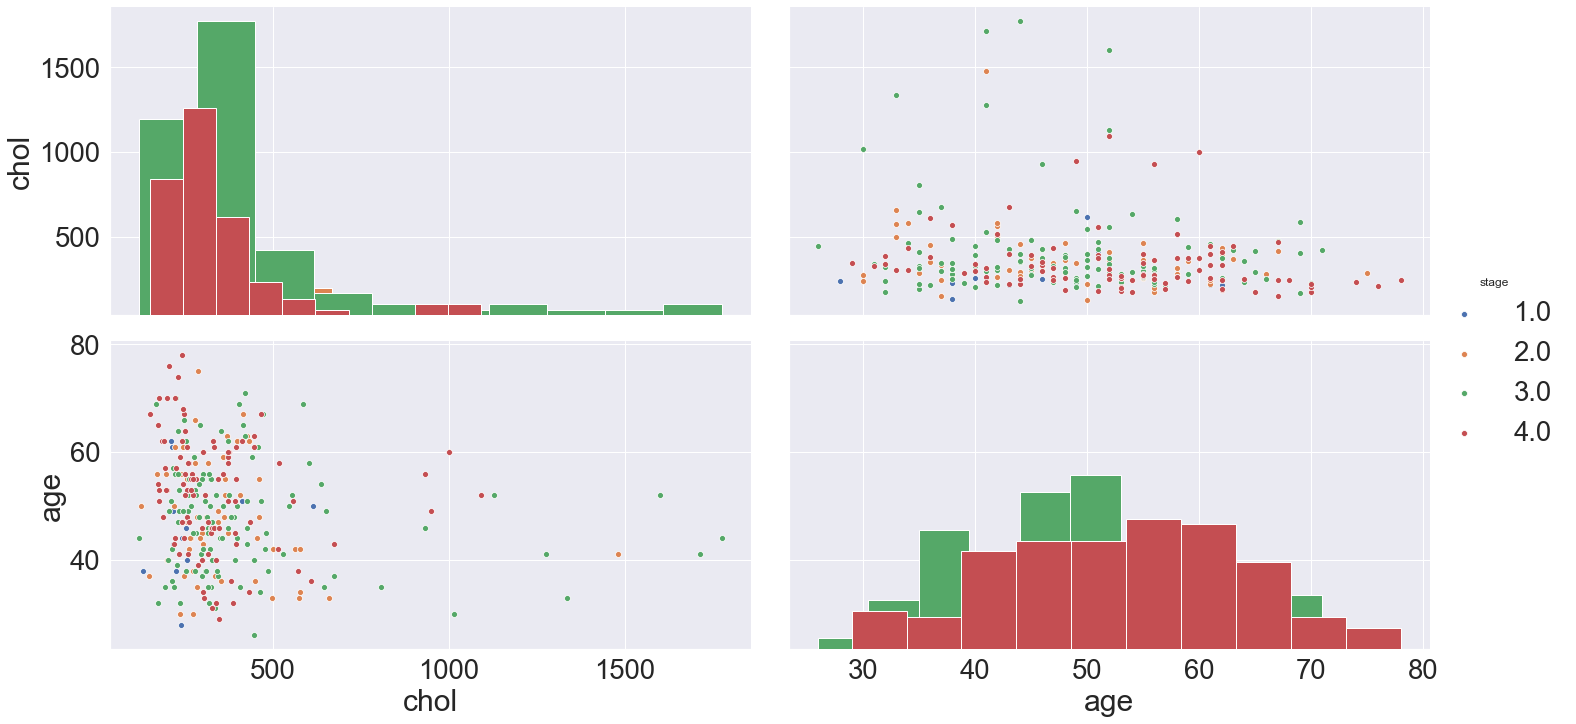

In [20]:
sns.pairplot(drawData[['chol', 'age', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

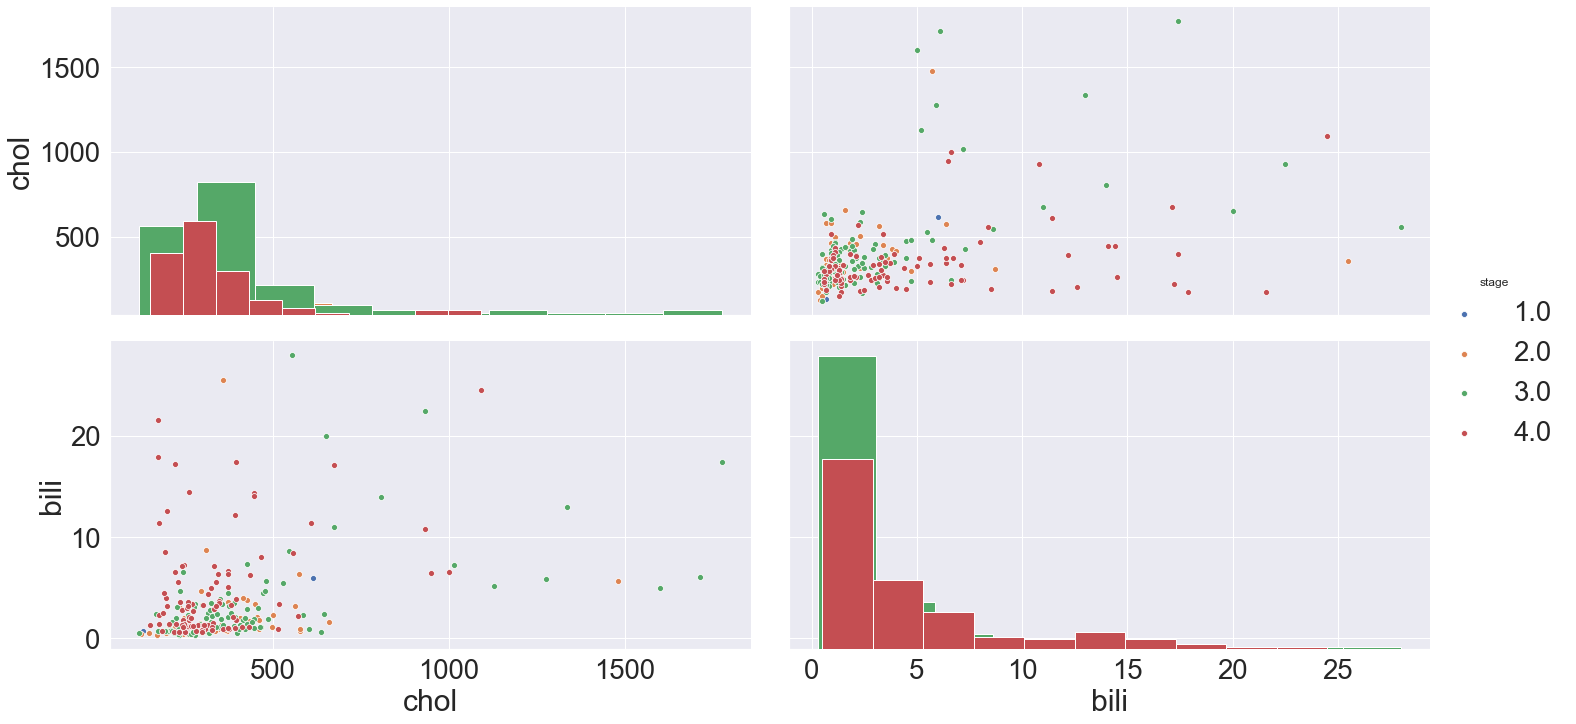

In [21]:
sns.pairplot(drawData[['chol', 'bili', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

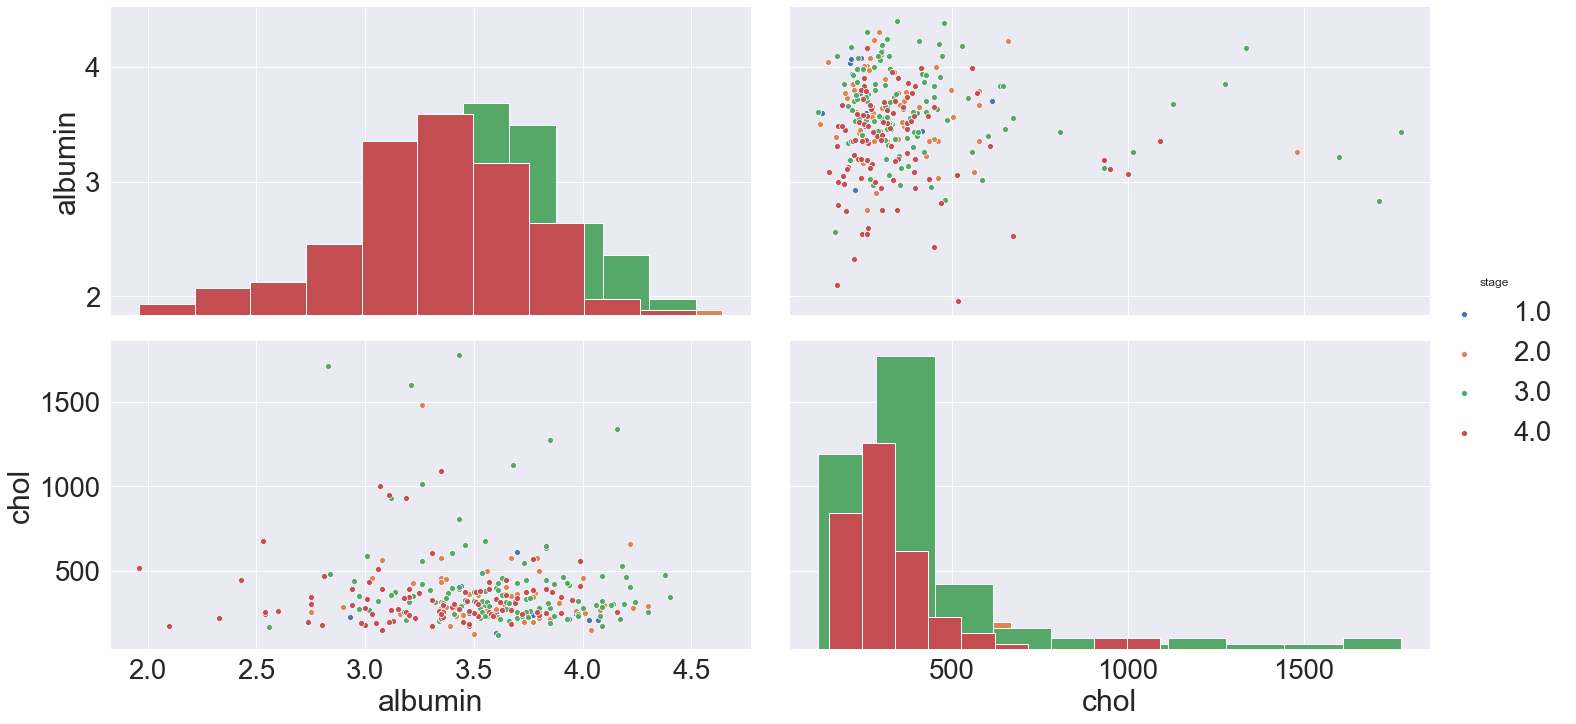

In [22]:
sns.pairplot(drawData[['albumin', 'chol', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

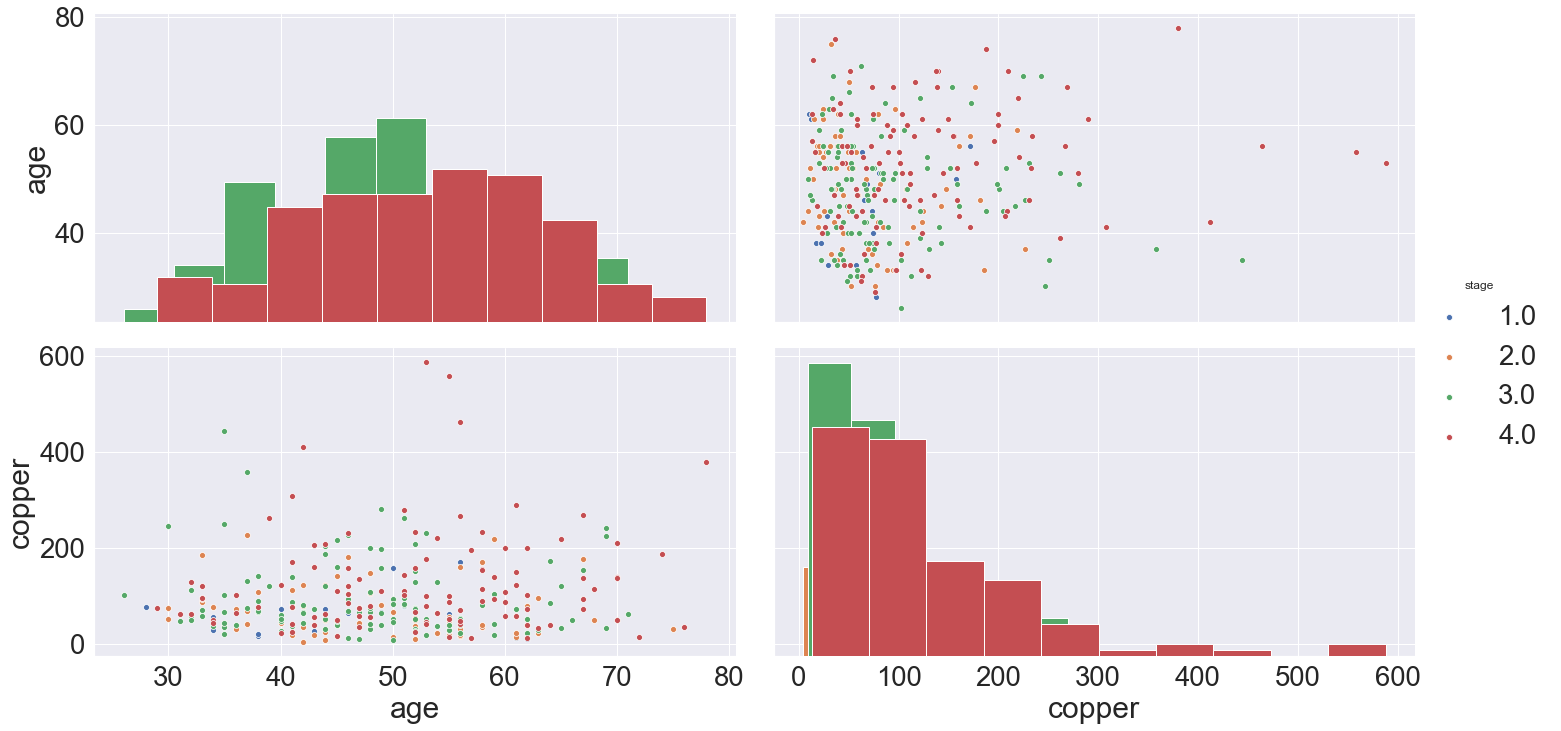

In [23]:
sns.pairplot(drawData[['age', 'copper', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

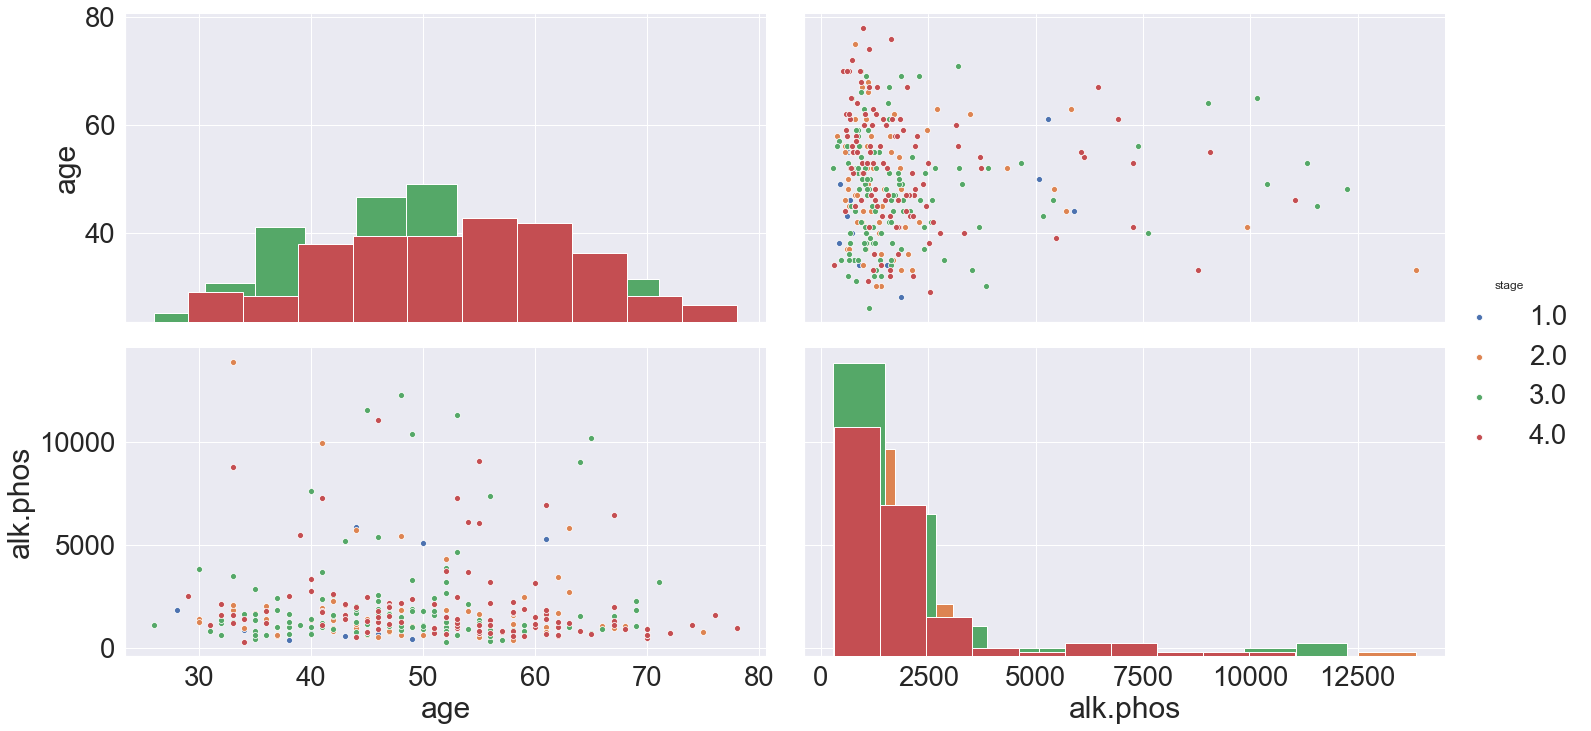

In [24]:
sns.pairplot(drawData[['age', 'alk.phos', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

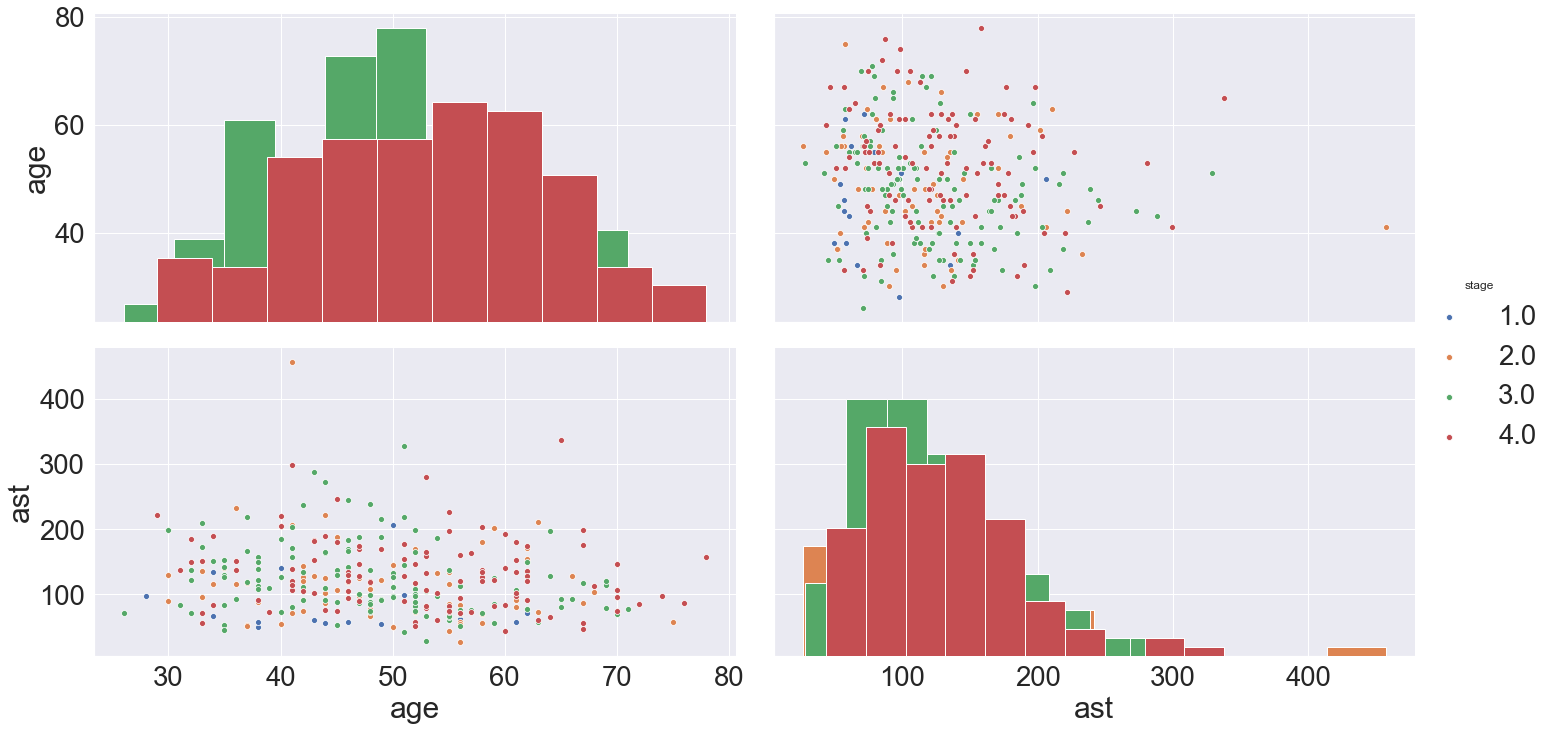

In [25]:
sns.pairplot(drawData[['age', 'ast', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

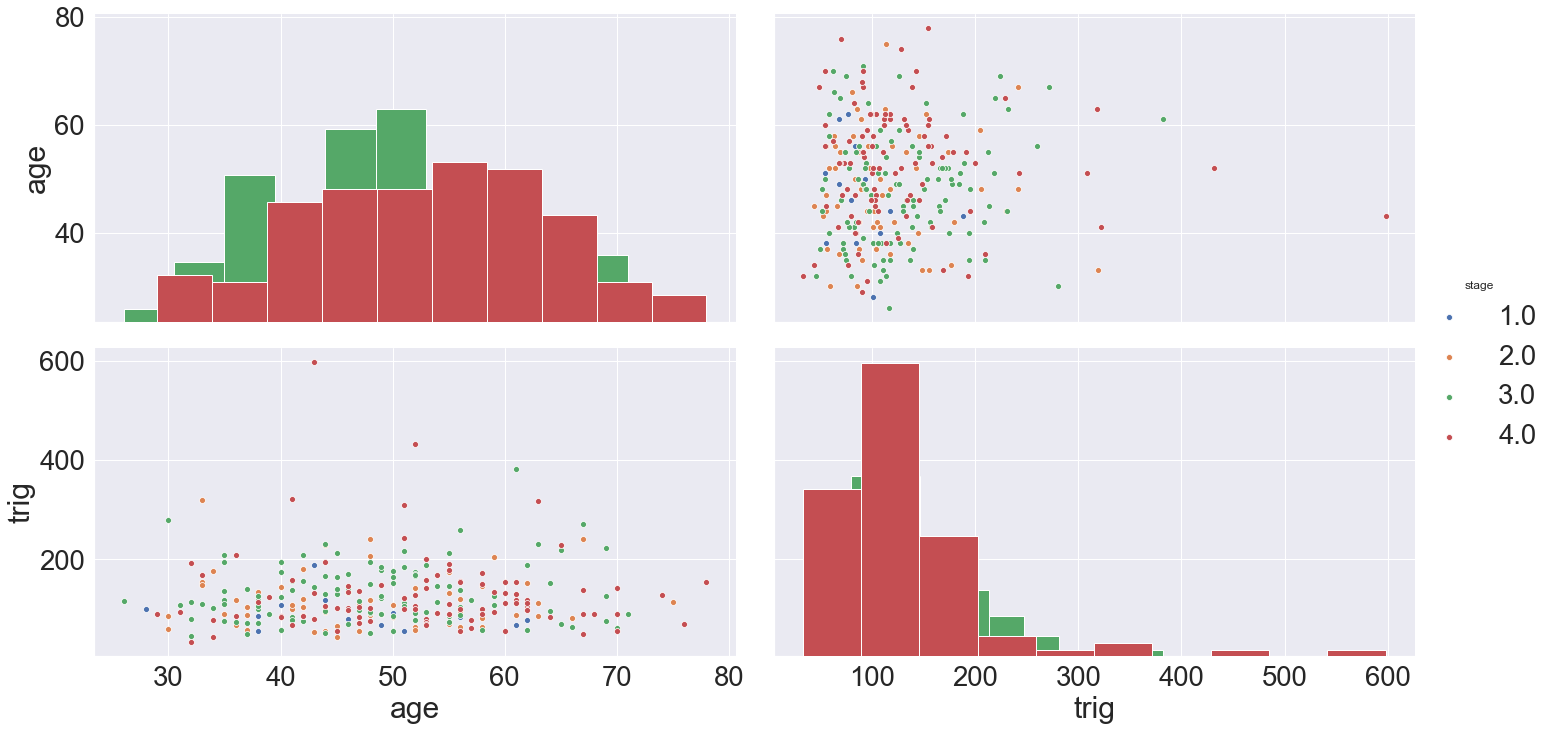

In [26]:
sns.pairplot(drawData[['age', 'trig', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

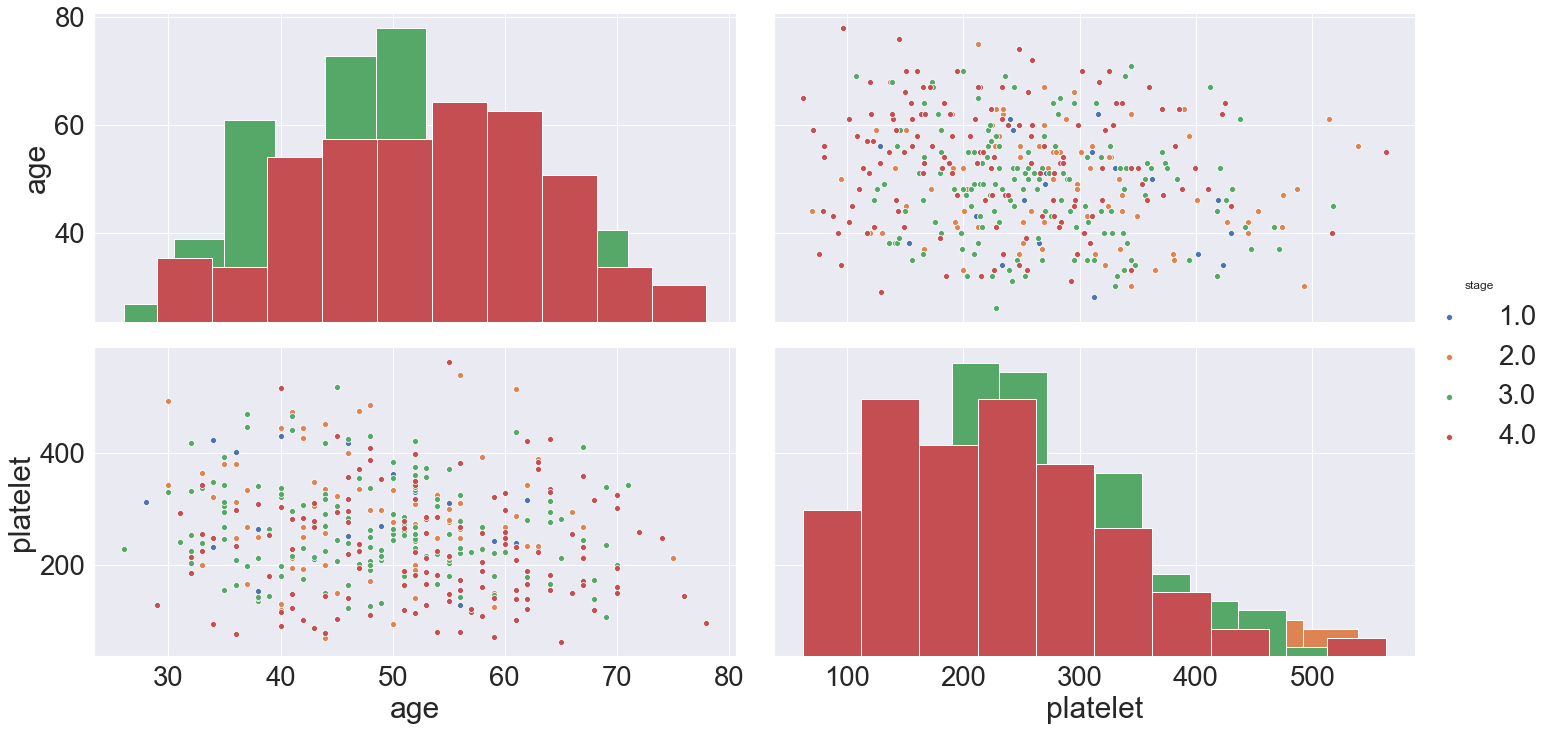

In [27]:
sns.pairplot(drawData[['age', 'platelet', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

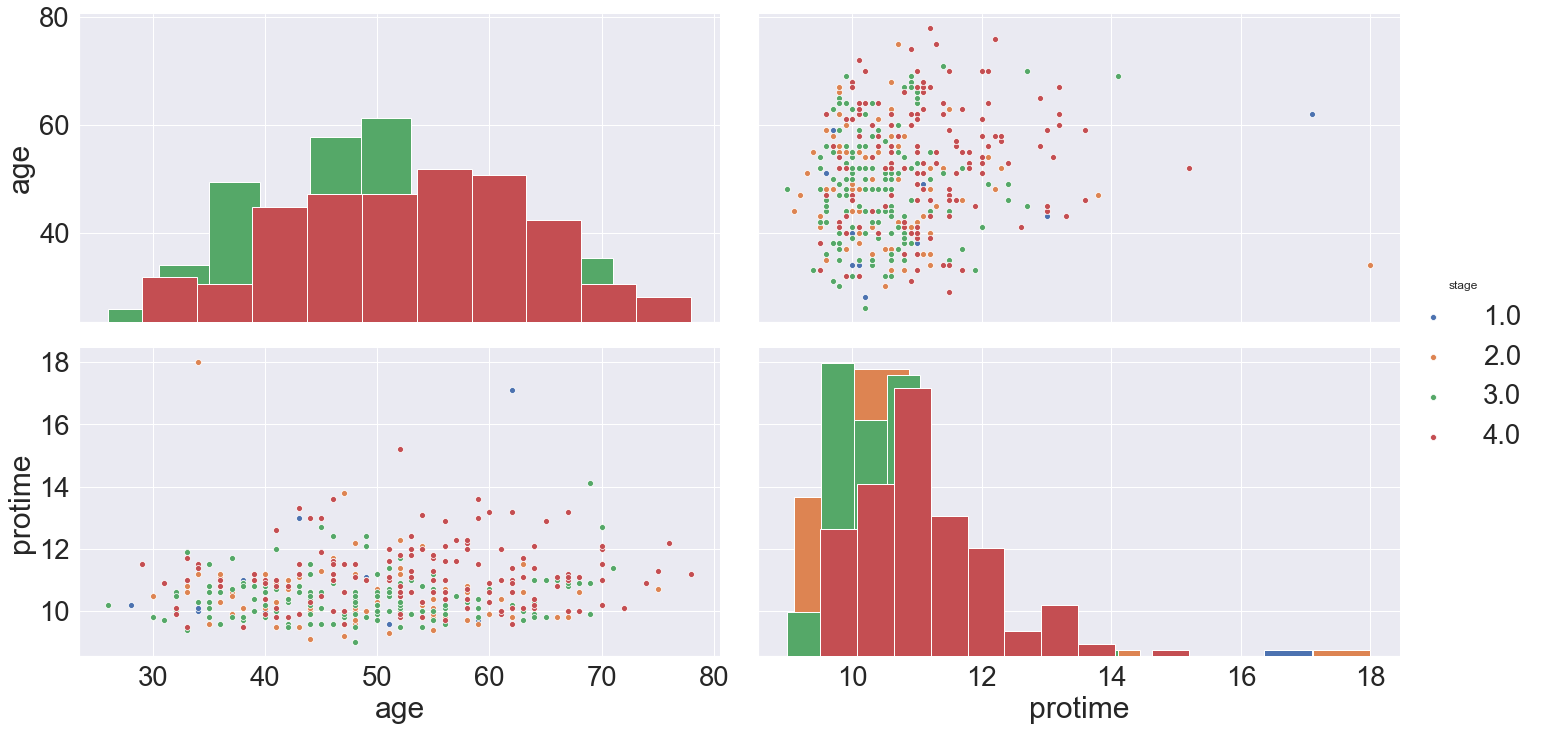

In [28]:
sns.pairplot(drawData[['age', 'protime', 'stage']], diag_kind='hist',  height=5,
    aspect=2, hue = 'stage')
sns.set(font_scale = 2.5)

## Box plots : 

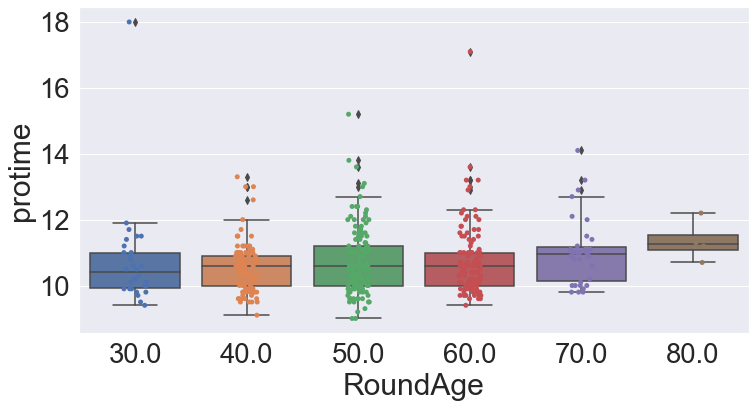

In [29]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'protime', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'protime', data = drawData)
sns.set(palette = 'ocean_r')

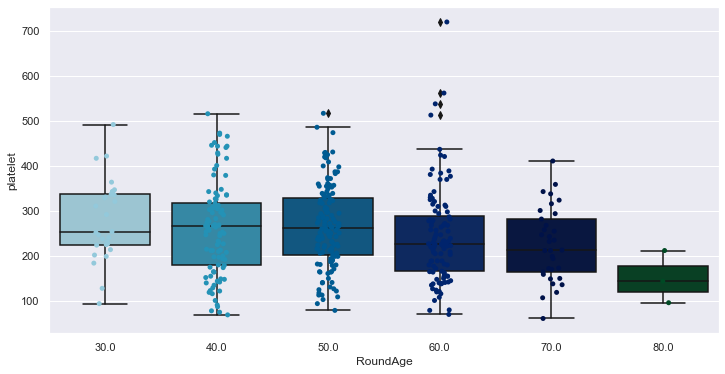

In [30]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'platelet', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'platelet', data = drawData)
sns.set(palette = 'ocean_r')

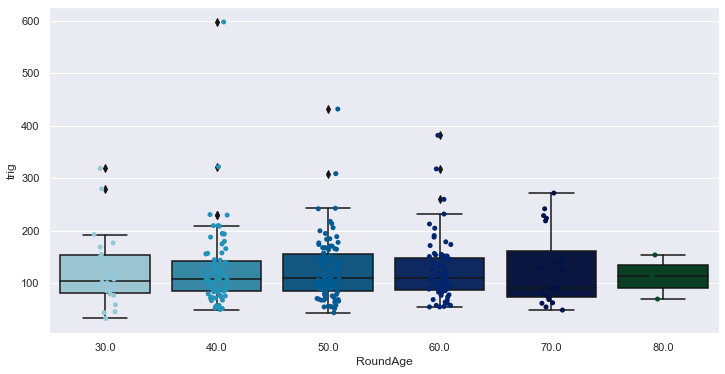

In [31]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'trig', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'trig', data = drawData)
sns.set(palette = 'ocean_r')

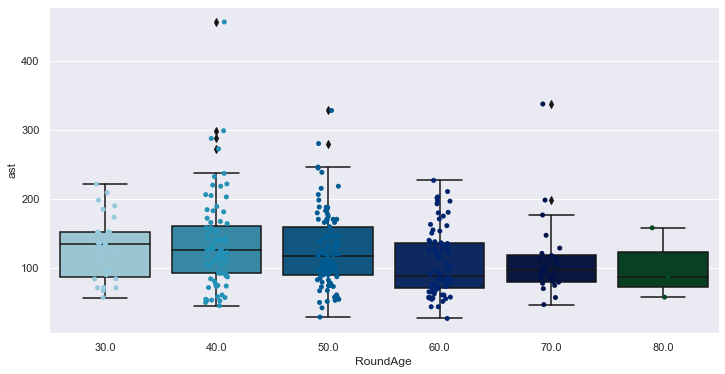

In [32]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'ast', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'ast', data = drawData)
sns.set(palette = 'ocean_r')

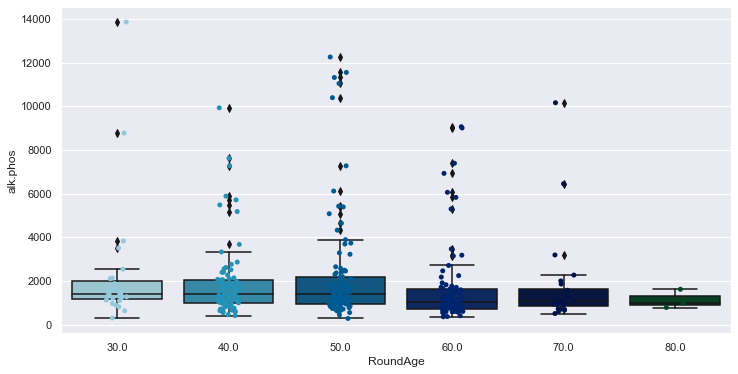

In [33]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'alk.phos', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'alk.phos', data = drawData)
sns.set(palette = 'ocean_r')

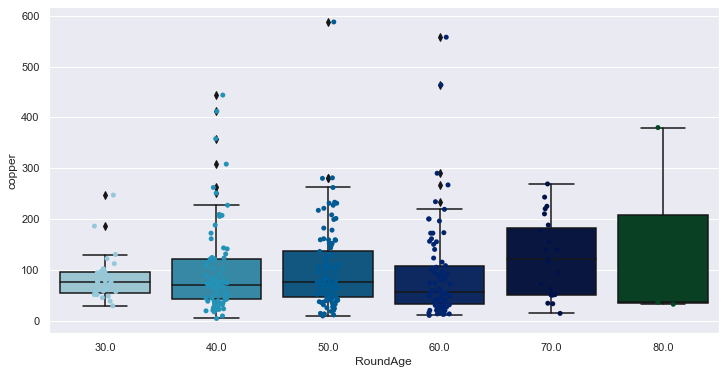

In [34]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'copper', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'copper', data = drawData)
sns.set(palette = 'ocean_r')

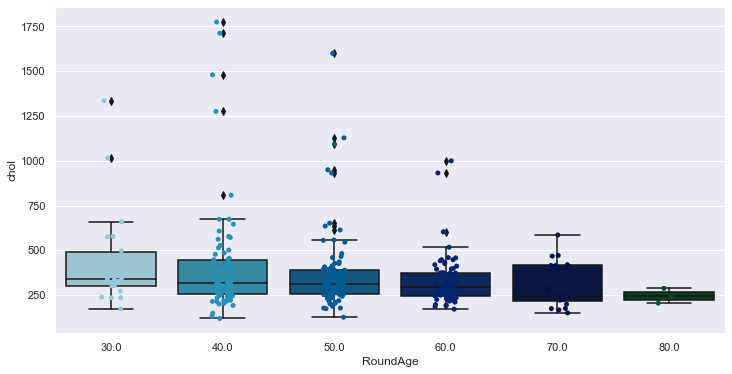

In [35]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'chol', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'chol', data = drawData)
sns.set(palette = 'ocean_r')

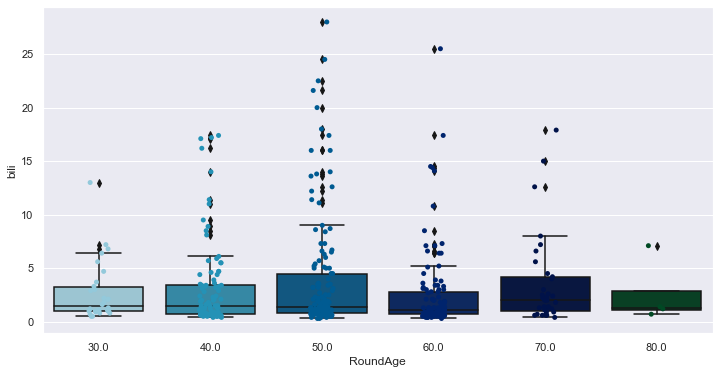

In [36]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'bili', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'bili', data = drawData)
sns.set(palette = 'ocean_r')

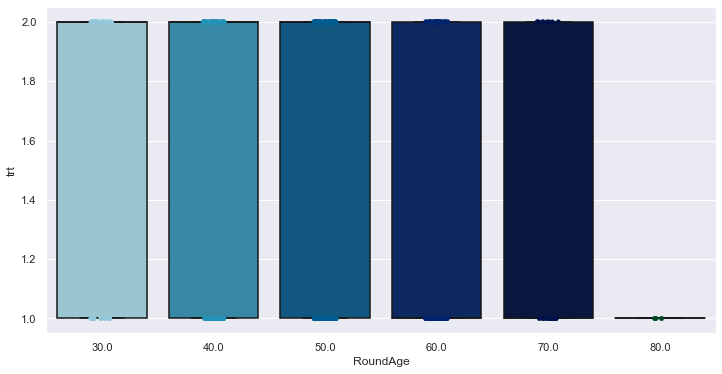

In [37]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'RoundAge',y =  'trt', data = drawData)
sns.stripplot(x = 'RoundAge',y =  'trt', data = drawData)
sns.set(palette = 'ocean_r')

## Box plots base on target feture: 

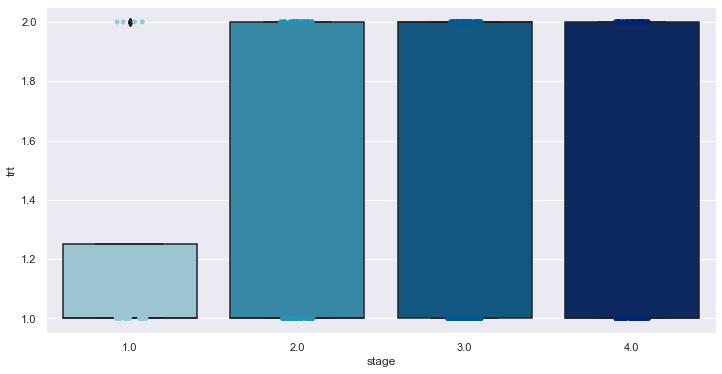

In [38]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'trt', data = drawData)
sns.stripplot(x = 'stage',y =  'trt', data = drawData)
sns.set(palette = 'ocean_r')

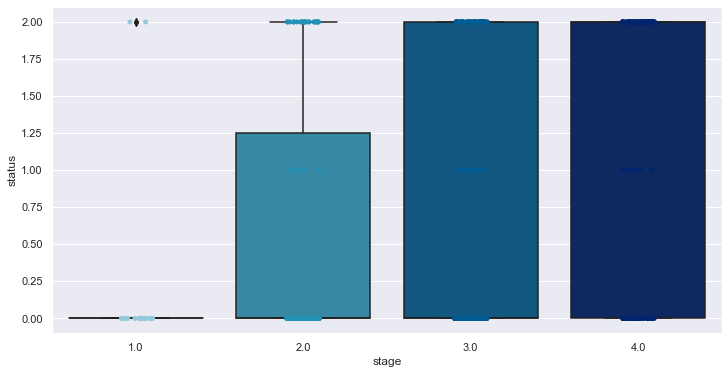

In [39]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'status', data = drawData)
sns.stripplot(x = 'stage',y =  'status', data = drawData)
sns.set(palette = 'ocean_r')

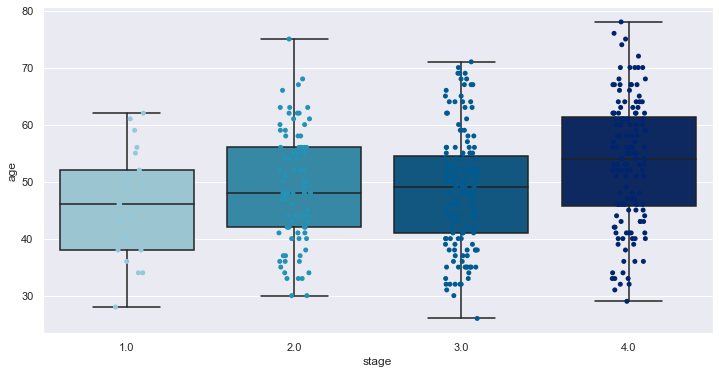

In [40]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'age', data = drawData)
sns.stripplot(x = 'stage',y =  'age', data = drawData)
sns.set(palette = 'ocean_r')

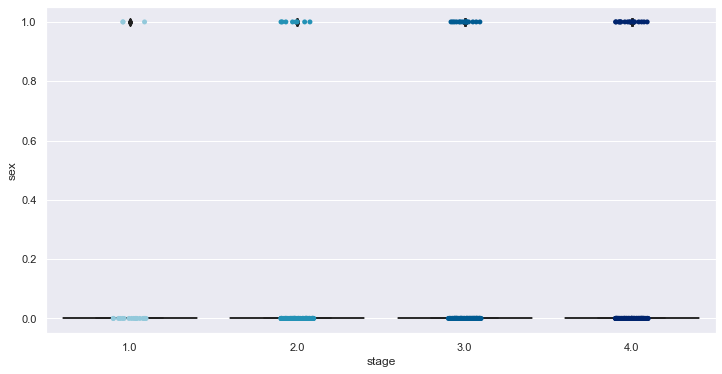

In [41]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'sex', data = drawData)
sns.stripplot(x = 'stage',y =  'sex', data = drawData)
sns.set(palette = 'ocean_r')

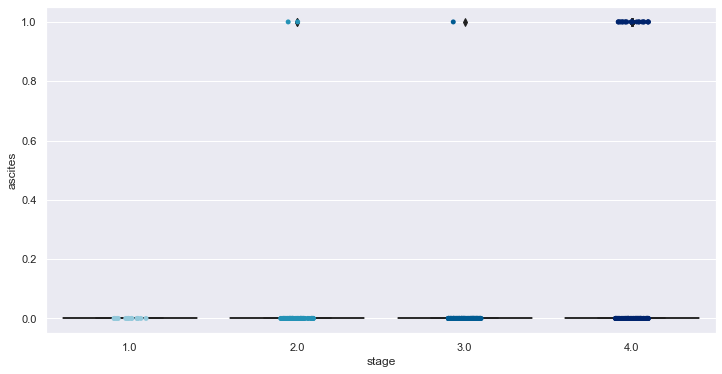

In [42]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'ascites', data = drawData)
sns.stripplot(x = 'stage',y =  'ascites', data = drawData)
sns.set(palette = 'ocean_r')

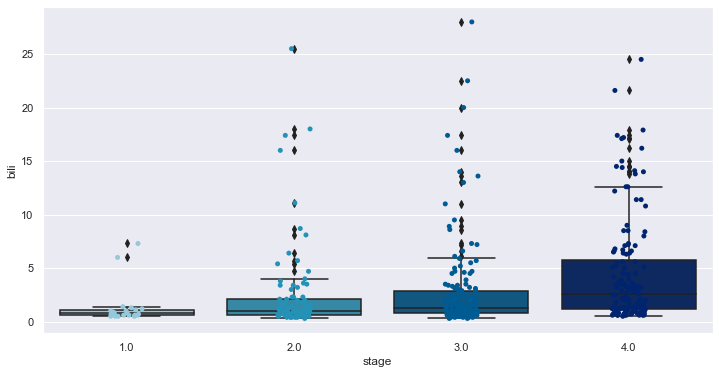

In [43]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'bili', data = drawData)
sns.stripplot(x = 'stage',y =  'bili', data = drawData)
sns.set(palette = 'ocean_r')

In [44]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'chol', data = drawData)
sns.stripplot(x = 'stage',y =  'chol', data = drawData)
sns.set(palette = 'ocean_r')

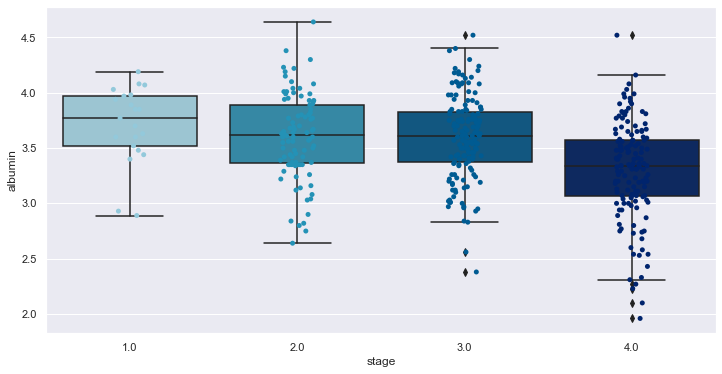

In [45]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'albumin', data = drawData)
sns.stripplot(x = 'stage',y =  'albumin', data = drawData)
sns.set(palette = 'ocean_r')

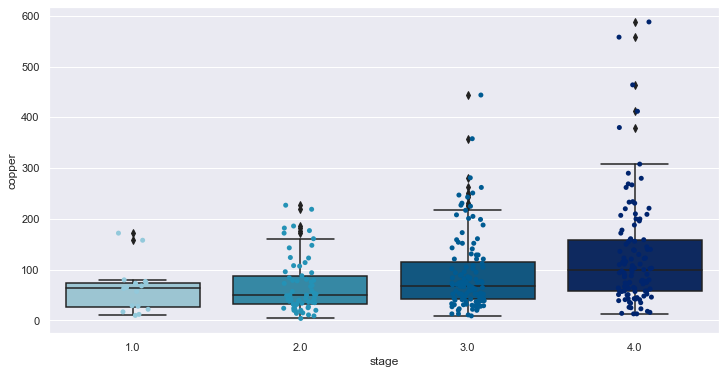

In [46]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'copper', data = drawData)
sns.stripplot(x = 'stage',y =  'copper', data = drawData)
sns.set(palette = 'ocean_r')

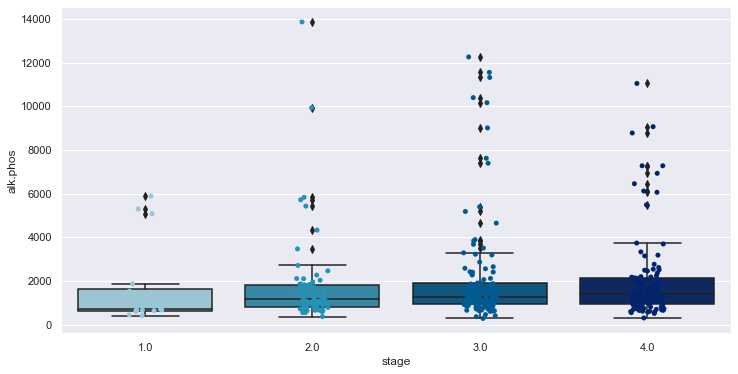

In [47]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'alk.phos', data = drawData)
sns.stripplot(x = 'stage',y =  'alk.phos', data = drawData)
sns.set(palette = 'ocean_r')

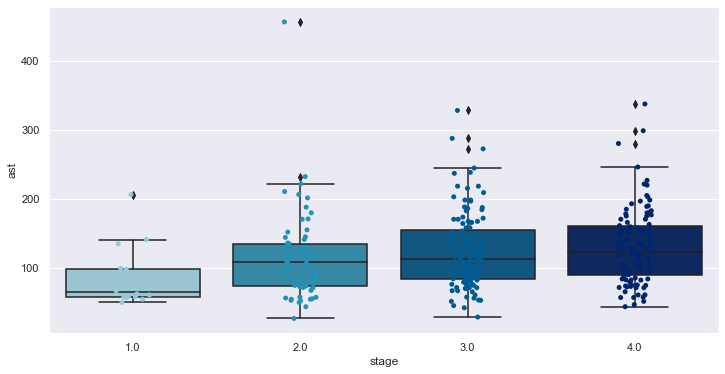

In [48]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'ast', data = drawData)
sns.stripplot(x = 'stage',y =  'ast', data = drawData)
sns.set(palette = 'ocean_r')

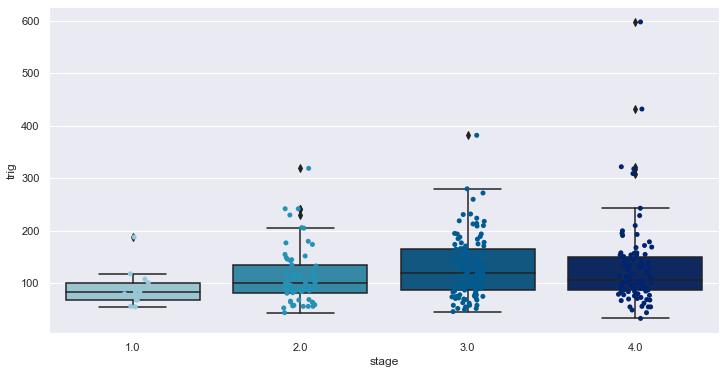

In [49]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'stage',y =  'trig', data = drawData)
sns.stripplot(x = 'stage',y =  'trig', data = drawData)
sns.set(palette = 'ocean_r')

In [50]:
# target feature null count & blacying value
stageCount = len(drawData.stage)
stageNull = drawData.stage.isnull().sum()
print(Back.GREEN+f'stage have '+Back.RED+(str(stageCount))+Back.GREEN+' instances(rows)')
print(Back.GREEN+f'stage have '+Back.RED+(str(stageNull))+'  '+
      Back.GREEN+' null values')
print('\n')
print(Back.GREEN+f'stage have '+Back.RED+(str(drawData.stage.value_counts()[1]))+Back.GREEN+' 1 value')
print(Back.GREEN+f'stage have '+Back.RED+(str(drawData.stage.value_counts()[2]))+Back.GREEN+' 2 value')
print(Back.GREEN+f'stage have '+Back.RED+(str(drawData.stage.value_counts()[3]))+Back.GREEN+' 3 value')
print(Back.GREEN+f'stage have '+Back.RED+(str(drawData.stage.value_counts()[4]))+Back.GREEN+' 4 value')

stage have 418 instances(rows)
stage have 6   null values


stage have 21 1 value
stage have 92 2 value
stage have 155 3 value
stage have 144 4 value


In [51]:
# dropna ( delete all null data) in dataset for learning process
WNDData = drawData.dropna()

In [52]:
# null data values in dataset, its should be 0 for learning process
# in first we don't fill null data and just use exist data
# we dont have balance dataset and in first we use unbolnce dataset
WNDData.isnull().sum()

id          0
time        0
status      0
trt         0
age         0
sex         0
ascites     0
hepato      0
spiders     0
edema       0
bili        0
chol        0
albumin     0
copper      0
alk.phos    0
ast         0
trig        0
platelet    0
protime     0
stage       0
RoundAge    0
dtype: int64

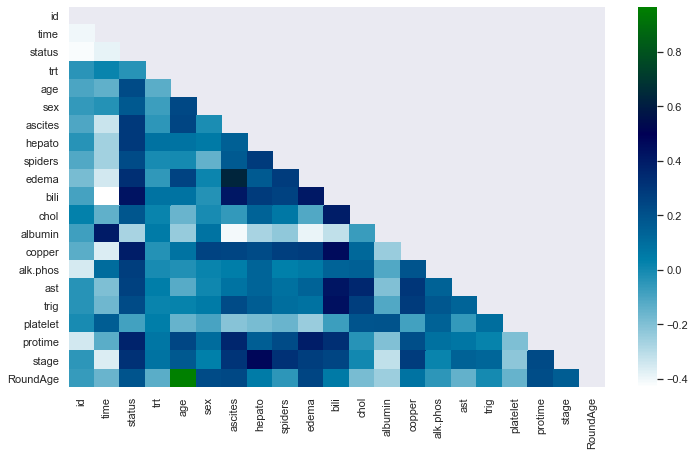

In [53]:
plt.figure(figsize = (12,7))
mask = np.triu(np.ones_like(WNDData.corr()))  
# plotting a triangle correlation heatmap 
dataplot = sns.heatmap(WNDData.corr(),cmap='ocean_r', mask=mask) 
  
# displaying heatmap 
plt.show() 

# Machine learning work 
## first split data into input(x): all feature axcept target and output(y): target feature
### split x, y into learning and test data
#### use this learning splited data by algorithms

In [54]:
# split dataset into x, y
x = WNDData.drop('stage', axis = 1)
y = WNDData.stage

In [55]:
# split input and output into training and test parts by train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

### --------------------------------- ***** ----------------------------
# Random Forst Classifier algrithm
### ---------------------------------------------------------------------

In [56]:
# call algorithm, firdt call Random Forest Classifier
RfcModel = RandomForestClassifier()

In [57]:
# Random forest classifier hyperparameters, we can improver model by other values for parametes
# fit process on training data: learning process
RfcModel.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
# Random Forest Classifier hyperparameters:
RfcModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
# learning accuracy
RfcModel.score(x_train, y_train)

1.0

In [60]:
# test accuracy
RfcModel.score(x_test, y_test)

0.42028985507246375

In [61]:
# predict values from test input(machine output predict)
y_predictrfc = RfcModel.predict(x_test)

In [62]:
# use classification eport for a complete view of algorithm accuracy
# use classification eport for a complete view of algorithm accuracy
print('*****************************************************')
print('   **Random Forest Classifier Results is here**     ')
print('*****************************************************')
print(classification_report(y_test, y_predictrfc))
print('*****************************************')

*****************************************************
   **Random Forest Classifier Results is here**     
*****************************************************
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.50      0.11      0.17        19
         3.0       0.37      0.62      0.46        26
         4.0       0.50      0.58      0.54        19

    accuracy                           0.42        69
   macro avg       0.34      0.32      0.29        69
weighted avg       0.42      0.42      0.37        69

*****************************************


C:\Users\Top\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
# confusion matrix for TN, FN, TP, FP
print(pd.DataFrame(data = confusion_matrix(y_test, y_predictrfc), columns = ['1', '2','3','4'],
                   index = ['1', '2','3','4']))

   1  2   3   4
1  0  0   5   0
2  0  2  14   3
3  0  2  16   8
4  0  0   8  11


In [64]:
# accuracy score report : true/all
accuracy_score(y_test, y_predictrfc)

0.42028985507246375

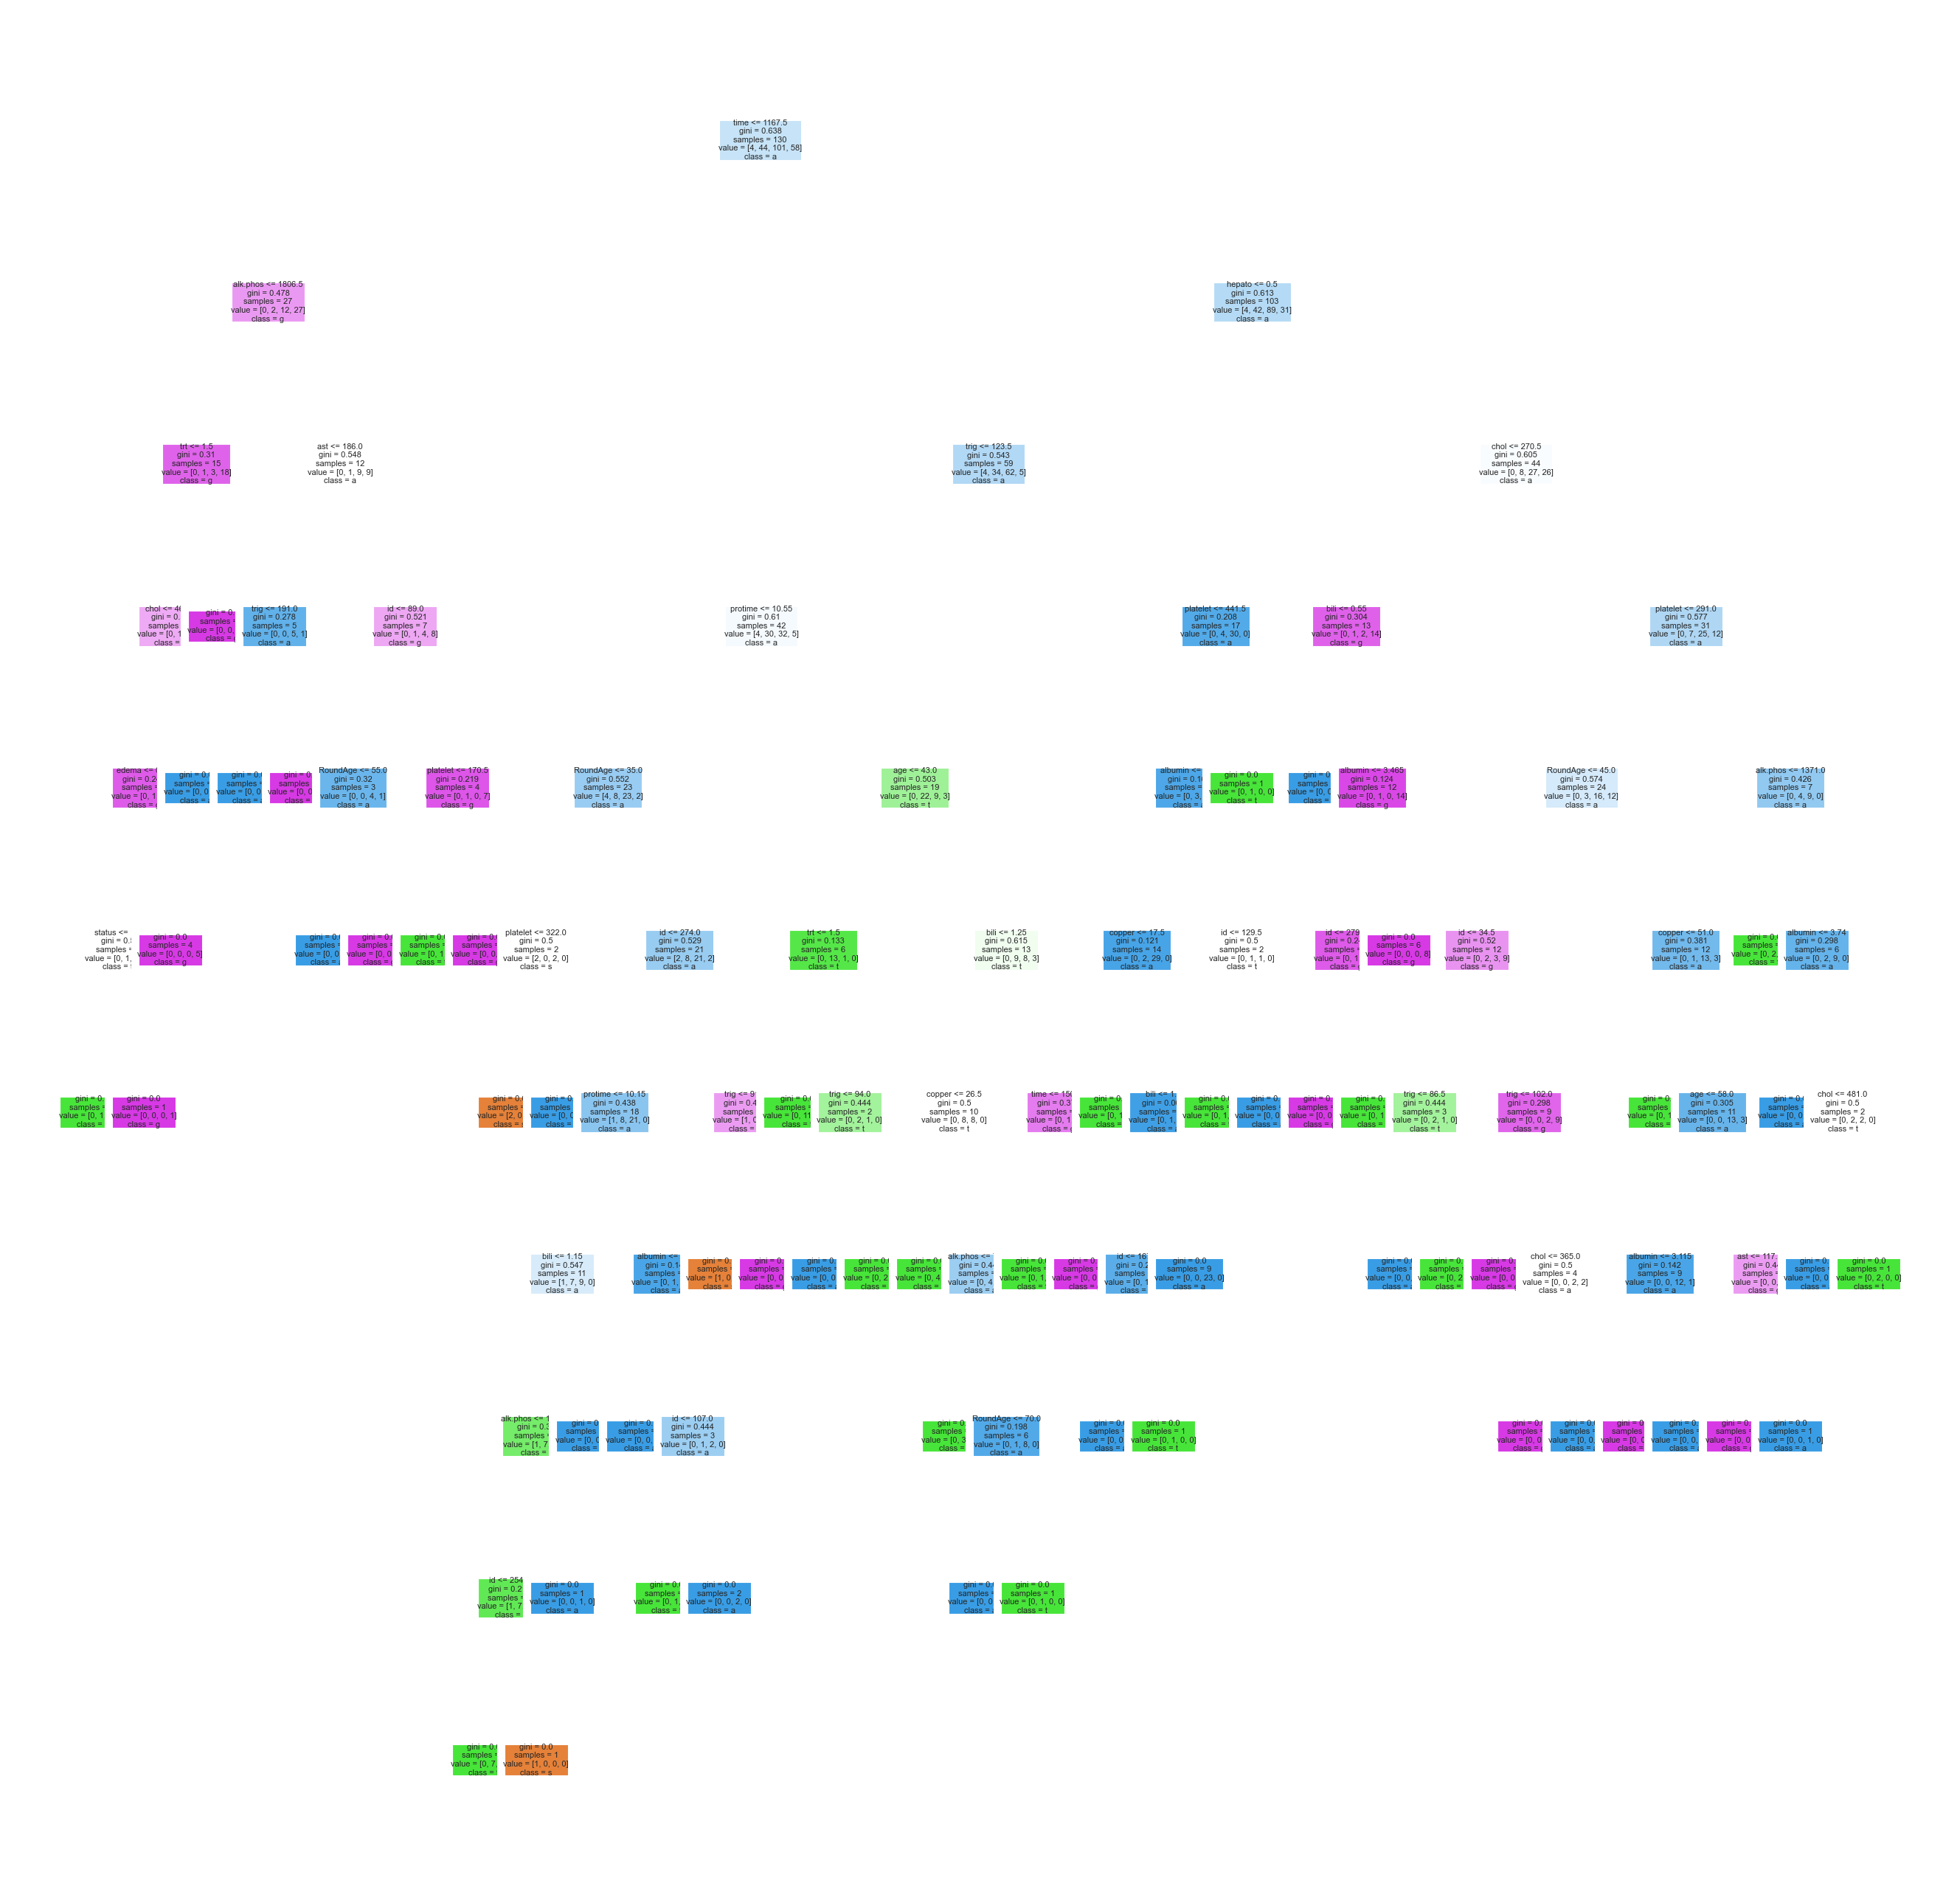

In [65]:
# Random Forest Classifier visualization 
fn=x.columns
cn='stage'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RfcModel.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

### --------------------------------- ***** ----------------------------
# Decision Tree algrithm
### ---------------------------------------------------------------------

In [66]:
DTModel = DecisionTreeClassifier()

In [67]:
DTModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
DTModel.score(x_train, y_train)

1.0

In [69]:
y_predictdt = DTModel.predict(x_test)

In [70]:
# use classification eport for a complete view of algorithm accuracy
print('****************************************')
print('    **Decision Tree Results is here**      ')
print('*****************************************')

print(classification_report(y_test, y_predictdt))
print('*****************************************')

****************************************
    **Decision Tree Results is here**      
*****************************************
              precision    recall  f1-score   support

         1.0       0.50      0.60      0.55         5
         2.0       0.55      0.32      0.40        19
         3.0       0.34      0.38      0.36        26
         4.0       0.30      0.37      0.33        19

    accuracy                           0.38        69
   macro avg       0.42      0.42      0.41        69
weighted avg       0.40      0.38      0.38        69

*****************************************


In [71]:
# confusion matrix for TN, FN, TP, FP
print(pd.DataFrame(data = confusion_matrix(y_test, y_predictdt), columns = ['1', '2','3','4'],
                  index = ['1', '2','3','4']))


   1  2   3   4
1  3  0   2   0
2  1  6   6   6
3  2  4  10  10
4  0  1  11   7


In [72]:
# accuracy score report : true/all
accuracy_score(y_test, y_predictdt)

0.37681159420289856

In [73]:
# decision tree tree
text_representation = tree.export_text(DTModel)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_1 <= 1375.00
|   |   |--- feature_0 <= 301.50
|   |   |   |--- feature_12 <= 3.70
|   |   |   |   |--- feature_10 <= 20.20
|   |   |   |   |   |--- feature_11 <= 409.50
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- feature_11 >  409.50
|   |   |   |   |   |   |--- feature_17 <= 305.00
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- feature_17 >  305.00
|   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- feature_10 >  20.20
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- feature_12 >  3.70
|   |   |   |   |--- feature_15 <= 94.83
|   |   |   |   |   |--- class: 4.0
|   |   |   |   |--- feature_15 >  94.83
|   |   |   |   |   |--- class: 3.0
|   |   |--- feature_0 >  301.50
|   |   |   |--- feature_15 <= 48.50
|   |   |   |   |--- class: 3.0
|   |   |   |--- feature_15 >  48.50
|   |   |   |   |--- class: 2.0
|   |--- feature_1 >  1375.00
|   |   |--- feature_15 <= 62.77
|   |   |   |---

#### Visualize DT by tree

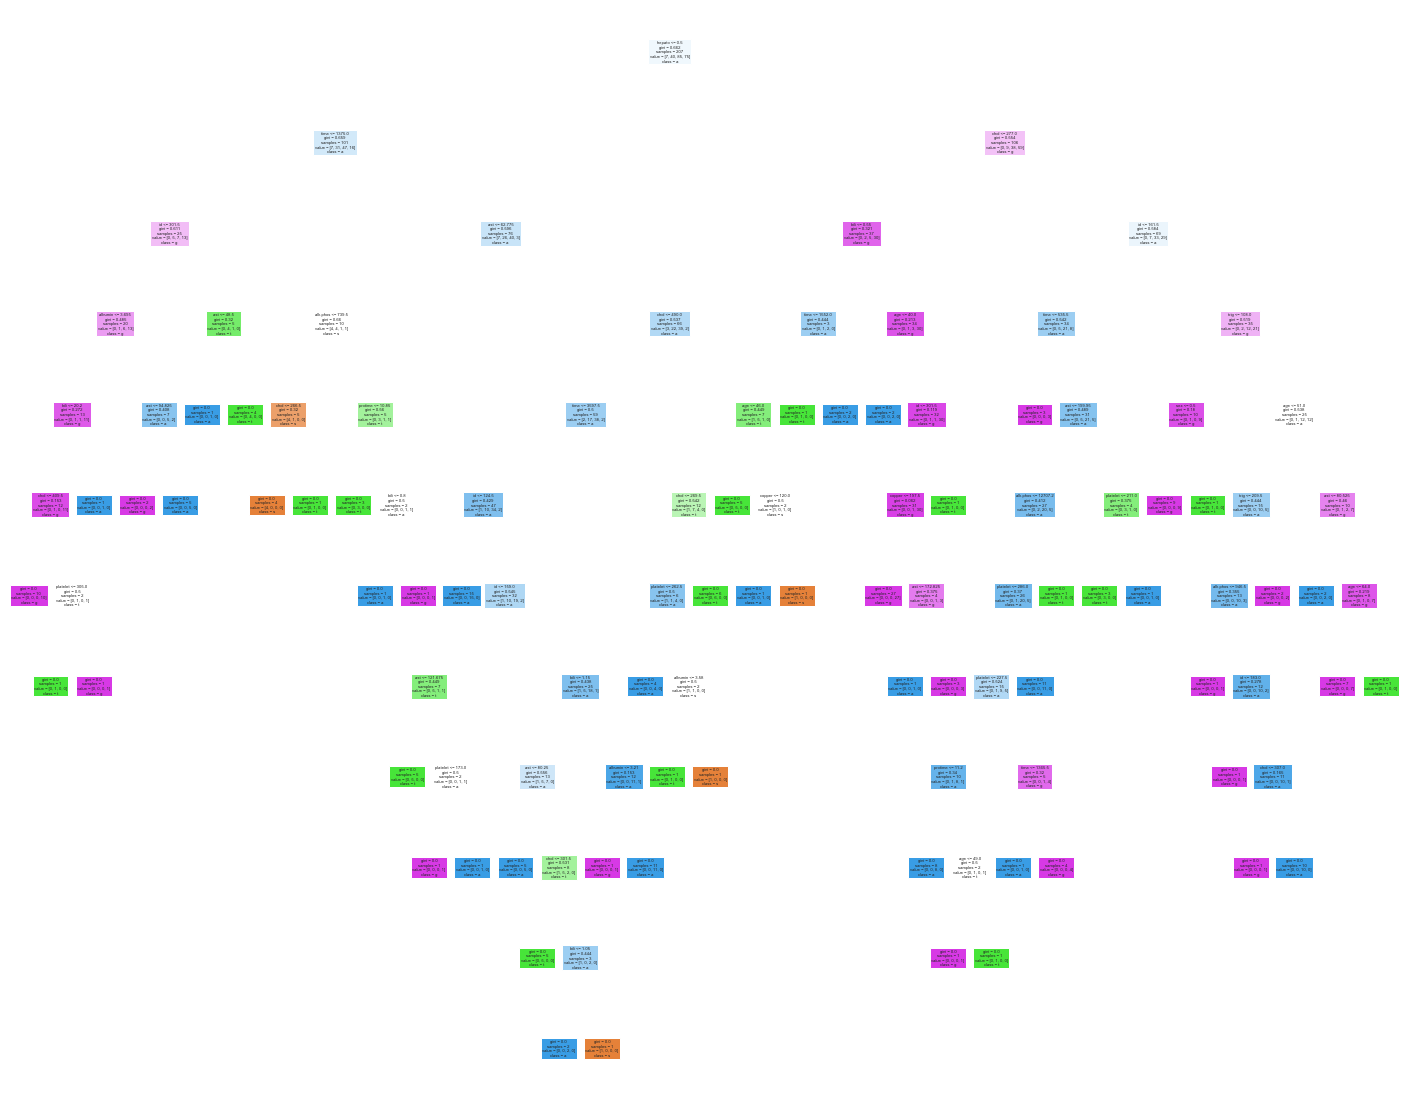

In [74]:

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTModel, 
                   feature_names=x.columns,  
                   class_names='stage',
                   filled=True)


###### visualize classification by DT 

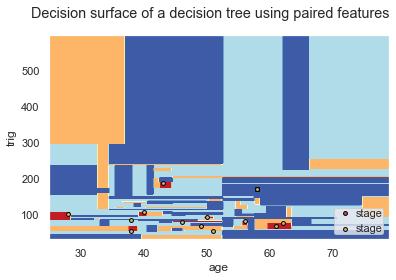

In [75]:
# classification surface by Age and Weight
# ------------------------------------------
# parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.2
# ---------------------------------------------

for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = x[['age', 'trig']]
    y = y
    X = np.array(X)
    y = np.array(y)
    y = y.reshape(-1, 1)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel('age')
    plt.ylabel('trig')

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label='stage',
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

#plt.figure(figsize = ((12, 5)))
#clf = DecisionTreeClassifier().fit(X, y)
#plot_tree(clf, filled=True)
plt.show()

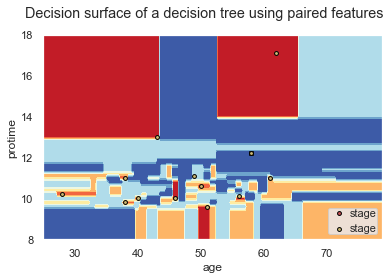

In [76]:
# classification surface by Age and Weight
# ------------------------------------------
# parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.2
# ---------------------------------------------

for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = x[['age', 'protime']]
    y = y
    X = np.array(X)
    y = np.array(y)
    y = y.reshape(-1, 1)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel('age')
    plt.ylabel('protime')

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label='stage',
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

#plt.figure(figsize = ((12, 5)))
#clf = DecisionTreeClassifier().fit(X, y)
#plot_tree(clf, filled=True)
plt.show()

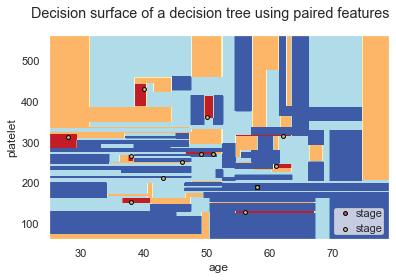

In [77]:
# classification surface by Age and Weight
# ------------------------------------------
# parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.2
# ---------------------------------------------

for pairidx, pair in enumerate([[0, 1]]):
    # We only take the two corresponding features
    X = x[['age', 'platelet']]
    y = y
    X = np.array(X)
    y = np.array(y)
    y = y.reshape(-1, 1)

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel('age')
    plt.ylabel('platelet')

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label='stage',
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

#plt.figure(figsize = ((12, 5)))
#clf = DecisionTreeClassifier().fit(X, y)
#plot_tree(clf, filled=True)
plt.show()

### ***--------------------------------------------------------------***
##                    ***********  LogisticRegression Algorithm ************
### ***--------------------------------------------------------------***

In [78]:
# Call the algorithm ( Logistic Regression model)
LRModel = LogisticRegression()

In [79]:
# see default hyperparameters here
LRModel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### use training data for training process

In [80]:
LRModel.fit(x_train, y_train)

C:\Users\Top\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
# training accuracy 
LRModel.score(x_train, y_train)

0.5410628019323671

In [82]:
## machine test data predict(predict of test data by machine)
y_predictlr = LRModel.predict(x_test)

In [83]:
# accuracy of test data
LRModel.score(x_test, y_test)

0.36231884057971014

In [84]:
# a complete report of accuracy of regression model
print('****************************************')
print('    **Logistic Regression Results is here**      ')
print('*****************************************')

print(classification_report(y_test, y_predictlr))
print('*****************************************')

****************************************
    **Logistic Regression Results is here**      
*****************************************
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00        19
         3.0       0.38      0.58      0.45        26
         4.0       0.40      0.53      0.45        19

    accuracy                           0.36        69
   macro avg       0.19      0.28      0.23        69
weighted avg       0.25      0.36      0.30        69

*****************************************


C:\Users\Top\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# confusion matrix for TN, FN, TP, FP
print(pd.DataFrame(data = confusion_matrix(y_test, y_predictlr), columns = ['1', '2','3','4'],
                  index = ['1', '2','3','4']))


   1  2   3   4
1  0  2   2   1
2  0  0  15   4
3  0  1  15  10
4  0  1   8  10


In [86]:
# accuracy score report : true/all
accuracy_score(y_test, y_predictlr)

0.36231884057971014

###### visualize the Logistic Regression Results

C:\Users\Top\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Top\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


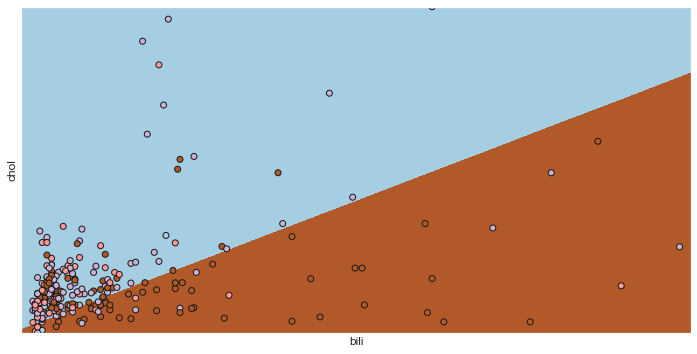

In [87]:
# by Age and Weights
X = x[['bili', 'chol']]  # we only take the first two features.
Y = y
X = np.array(X)
Y = np.array(Y)

logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('bili')
plt.ylabel('chol')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

C:\Users\Top\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Top\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


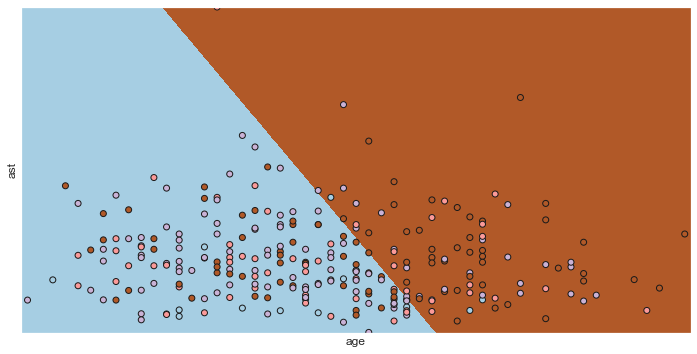

In [88]:
# by Age and Weights
X = x[['age', 'ast']]  # we only take the first two features.
Y = y
X = np.array(X)
Y = np.array(Y)

logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('ast')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### ***--------------------------------------------------------------***
##          ***********  Support Vector Machine Algorithm ************
### ***--------------------------------------------------------------***

In [89]:
# call support vector machine 
svcModel = SVC()

In [90]:
# hyperparameter of SVC
svcModel.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### use training data for training proces

In [91]:
# fit training data by SVC
svcModel.fit(x_train, y_train)

SVC()

In [92]:
# training data accuracy
svcModel.score(x_train, y_train)

0.5603864734299517

In [93]:
# predict by test data for svc
y_predictsvc = svcModel.predict(x_test)

In [94]:
# a complete report of accuracy of SVC model
print('****************************************')
print('    **SVC Results is here**      ')
print('*****************************************')

print(classification_report(y_test, y_predictsvc))
print('*****************************************')

****************************************
    **SVC Results is here**      
*****************************************
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00        19
         3.0       0.44      0.92      0.59        26
         4.0       0.50      0.37      0.42        19

    accuracy                           0.45        69
   macro avg       0.23      0.32      0.25        69
weighted avg       0.30      0.45      0.34        69

*****************************************


C:\Users\Top\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
# confusion matrix for TN, FN, TP, FP
print(pd.DataFrame(data = confusion_matrix(y_test, y_predictsvc), columns = ['1', '2', '3','4'],
                  index = ['1', '2','3','4']))


   1  2   3  4
1  0  0   5  0
2  0  0  14  5
3  0  0  24  2
4  0  0  12  7


In [96]:
# accuracy score report : true/all
accuracy_score(y_test, y_predictsvc)

0.4492753623188406

###### visualize the SVC Results

No handles with labels found to put in legend.


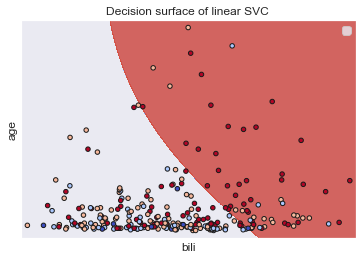

<Figure size 864x504 with 0 Axes>

In [97]:
#visualize Mayo dataset with Age and bili
iris = pd.read_csv('2019 Mayo Clinic Primary Biliary Cirrhosis Data.csv')
iris = iris.dropna()
X = iris[['age', 'bili']]  # we only take the first two features.
y = iris['stage']
X = np.array(X)
y = np.array(y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = svcModel.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plt.figure(figsize = (12, 7))
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('age')
ax.set_xlabel('bili')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

No handles with labels found to put in legend.


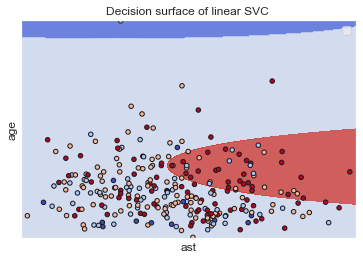

<Figure size 864x504 with 0 Axes>

In [98]:
#visualize Mayo dataset with Age and ast
iris = pd.read_csv('2019 Mayo Clinic Primary Biliary Cirrhosis Data.csv')
iris = iris.dropna()
X = iris[['age', 'ast']]  # we only take the first two features.
y = iris['stage']
X = np.array(X)
y = np.array(y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = svcModel.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plt.figure(figsize = (12, 7))
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('age')
ax.set_xlabel('ast')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()